Question 1: OLS Regression – Growth [25 points]
Using the Growth data, carry out the following exercises. Exclude the data for Malta.

a. [5] Construct a table that shows the sample mean, standard deviation,
and minimum and maximum values for the series Growth, TradeShare, YearsSchool, Oil, Rev_Coups, Assassinations, and RGDP60. Include the appropriate units for all entries.

In [1]:
import pandas as pd

# Load the data, excluding Malta
df = pd.read_stata('data/Growth.dta')

In [2]:
df

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,0.0,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,0.0,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,0.0,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,0.0,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,0.0,9895.003906,0.160815,8.66,0.000000,0.433333
...,...,...,...,...,...,...,...,...
60,Cyprus,5.384184,0.0,2037.000366,0.979355,4.29,0.100000,0.166667
61,Malaysia,4.114544,0.0,1420.000244,1.105364,2.34,0.033333,0.033333
62,Belgium,2.651335,0.0,5495.001953,1.115917,7.46,0.000000,0.000000
63,Mauritius,3.024178,0.0,2861.999268,1.127937,2.44,0.000000,0.000000


In [3]:
import pandas as pd
df_nomalta = df[df['country_name'] != 'Malta']

# Correct column names to match the DataFrame
cols = ['growth', 'tradeshare', 'yearsschool', 'oil', 'rev_coups', 'assasinations', 'rgdp60']

# Compute summary statistics
summary = df_nomalta[cols].agg(['mean', 'std', 'min', 'max']).T

# Optionally add units for interpretation (as a column or inline comments)
units = {
    'growth': 'percent per year',
    'tradeshare': 'fraction',
    'yearsschool': 'years',
    'oil': 'indicator (1/0)',
    'rev_coups': 'number',
    'assasinations': 'number per million',
    'rgdp60': 'US dollars (1960)'
}

summary['units'] = summary.index.map(units)

summary

,mean,std,min,max,units
growth,1.869120,1.816189,-2.811944,7.156855,percent per year
tradeshare,0.542392,0.228333,0.140502,1.127937,fraction
yearsschool,3.959219,2.553465,0.200000,10.070000,years
oil,0.000000,0.000000,0.000000,0.000000,indicator (1/0)
rev_coups,0.170067,0.225456,0.000000,0.970370,number
assasinations,0.281901,0.494159,0.000000,2.466667,number per million
rgdp60,3130.812500,2522.978516,366.999939,9895.003906,US dollars (1960)


b. Run a regression of Growth on TradeShare, YearsSchool, Rev_Coups, Assassinations,
and RGDP60. What is the value of the coefficient on Rev_Coups? Interpret the value of
this coefficient. Is it large or small in a real-world sense?

In [4]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 준비
X = df_nomalta[['tradeshare', 'yearsschool', 'rev_coups', 'assasinations', 'rgdp60']]
X = sm.add_constant(X)
y = df_nomalta['growth']

# 회귀분석 실행
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

# rev_coups 계수 추출 및 출력
rev_coups_coef = model.params['rev_coups']
print(f"\nCoefficient on rev_coups: {rev_coups_coef:.4f}")

# 해석을 한국어로 출력
if abs(rev_coups_coef) >= 0.5:
    size_comment = "실질적으로 매우 큰 값입니다."
elif abs(rev_coups_coef) >= 0.1:
    size_comment = "실질적으로 중간 정도의 값입니다."
else:
    size_comment = "실질적으로 작은 값입니다."

ko_message = (
    f"Rev_Coups 변수의 계수는 {rev_coups_coef:.4f}입니다. "
    "이는 다른 변수들이 고정된 상태에서, 정변 쿠데타(Rev_Coups)가 1 증가할 때 "
    f"경제 성장률(growth)이 평균적으로 {rev_coups_coef:.4f} 포인트 변화함을 의미합니다. "
    f"이 계수는 {size_comment}"
)
print("\n"+ko_message)


                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     4.764
Date:                Thu, 13 Nov 2025   Prob (F-statistic):            0.00103
Time:                        13:27:27   Log-Likelihood:                -117.49
No. Observations:                  64   AIC:                             247.0
Df Residuals:                      58   BIC:                             259.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6269      0.783      0.801

c. Use the regression to predict the average annual growth rate for a country that has
average values for all regressors.

In [5]:
# 평균값으로 이루어진 새로운 관측치를 생성
mean_values = df_nomalta[['tradeshare', 'yearsschool', 'rev_coups', 'assasinations', 'rgdp60']].mean()
mean_values_with_const = [1] + mean_values.tolist()  # const 포함

# 예측 (평균값 대입)
pred_growth = model.predict([mean_values_with_const])[0]
print(f"Predicted average annual growth rate (using regressor means): {pred_growth:.4f}")


Predicted average annual growth rate (using regressor means): 1.8691


d. Repeat (c), but now assume that the country’s value for TradeShare is one standard
deviation above the mean.

In [ ]:
# 평균값 벡터를 복사하여 TradeShare만 한 표준편차 더한 값으로 변경
mean_vals_sd = mean_values.copy()
trade_share_mean = mean_values['tradeshare']
trade_share_std = df_nomalta['tradeshare'].std()
mean_vals_sd['tradeshare'] = trade_share_mean + trade_share_std

mean_vals_sd_with_const = [1] + mean_vals_sd.tolist()  # const 포함

# 예측
pred_growth_sd = model.predict([mean_vals_sd_with_const])[0]
print(f"Predicted average annual growth rate (TradeShare = mean + 1 sigma): {pred_growth_sd:.4f}")


Predicted average annual growth rate (TradeShare = mean + 1 sigma): 2.1753


e. Why is Oil omitted from the regression? What would happen if it were included?

Oil 변수는 데이터셋에서 모두 0의 값을 가지므로, 분산이 0이고 상수항과 완전히 공선(linearly dependent)합니다.
이런 경우 회귀식에 포함시키면 완벽한 다중공선성(perfect multicollinearity)로 인해 statsmodels가 자동으로 해당 변수를 제외(omit)합니다. 만약 강제로 포함하려 한다면 회귀모형이 추정되지 않거나, 결과에서 자동으로 제거되어 나타날 것입니다.


Question 2: Instrumental Variables – Returns to Schooling [40 points]
In this exercise, you will follow Card (1993) to estimate the returns to schooling, which is
a classic question in labor economics. It is generally accepted that schooling is positively
associated with earnings, but measuring the causal relationship between them is not
straightforward due to the endogeneity in schooling. To obtain a plausibly exogenous variation in
schooling, Card (1993) uses geographic proximity to colleges as an instrument for schooling. Use
the stata file, Card.dta.
To be more concrete, consider the following causal model:
log 𝑌 = 𝛼 + 𝛿𝑠 + 𝛾𝑋 + 𝜀
where 𝑌 is earnings, 𝑠 is years of schooling, 𝑋 is an (exogenous) covariate matrix, and 𝜀 is an
individual-level idiosyncratic shock. The OLS estimate of 𝛿 will not be consistent for the causal
effect because 𝑠 is endogenous. For example, 𝜀 may include unobserved characteristics, such as
an individual’s ability, which may correlate with both 𝑠 and 𝑌. Thus, Card (1993) proposes using
𝑧, an indicator for having a 4-year college in one’s county, as an instrumental variable for 𝑠.

In [13]:

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Load the Card (1993) data
card = pd.read_stata("data/Card.dta")
print(card.head().to_string())

    id  nearc2  nearc4  educ   age  fatheduc  motheduc    weight  momdad14  sinmom14  step14  reg661  reg662  reg663  reg664  reg665  reg666  reg667  reg668  reg669  south66  black  smsa  south  smsa66   wage  enroll   KWW     IQ  married  libcrd14  exper     lwage  expersq   u_lwage  lwage_hat    u_educ
0  2.0     0.0     0.0   7.0  29.0       NaN       NaN  158413.0       1.0       0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0    1.0   1.0    0.0     1.0  548.0     0.0  15.0    NaN      1.0       0.0   16.0  6.306275    256.0  0.198047   6.108228 -3.067539
1  3.0     0.0     0.0  12.0  27.0       8.0       8.0  380166.0       1.0       0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0.0    0.0   1.0    0.0     1.0  481.0     0.0  35.0   93.0      1.0       1.0    9.0  6.175867     81.0 -0.211160   6.387027 -1.727562
2  4.0     0.0     0.0  12.0  34.0      14.0      12.0  367470.0       1.0       0

a) [10] In order for 𝑧 to be a legitimate instrument variable, it must be a strong predictor of 𝑠.
Conceptually, do you think living close to a 4-year college in one’s county is a good predictor
of one’s schooling? Why or why not?

Yes, living close to a 4-year college in one’s county is conceptually a good predictor of years of schooling.
사람이 살고 있는 지역에 4년제 대학이 가까이 있으면, 다음과 같은 이유로 학교를 더 오래 다닐 가능성이 높아집니다:

접근성(Accessibility):
대학이 가까우면 통학이 가능하므로, 등록 비용(특히 주거비용, 이동비용 등)이 줄어듭니다.
이는 대학 진학의 경제적 장벽을 낮추고, 평균 교육연수를 늘릴 수 있습니다.

정보 및 인식 효과(Information and Aspirations):
근처에 대학이 있으면 대학생이나 대학 문화에 노출될 기회가 많아지고,
“나도 대학에 갈 수 있다”는 인식과 동기부여가 높아집니다.

사회적 네트워크 효과(Social influence):
주변 친구나 지역 커뮤니티에서 대학 진학률이 높을 경우, 개인도 교육을 더 받을 확률이 높아집니다.

b) [10] For the exclusion restriction to be valid, living close to a 4-year college in one’s county
must not affect earnings directly. In other words, schooling must be the only channel through
which geographic proximity can affect one’s earnings. Do you think it is valid? Why or why
not?

Assuming that the exclusion restriction holds, let us estimate the IV regression equation using data.
Card (1993) uses the Young Men Cohort of the 1966 National Longitudinal Survey. The data file
is card.dta. Here are its key variables:
• wage: earnings
• educ: years of schooling
• exper: potential work experience (age - educ - 6)
2
• black: an indicator for the black population
• south: an indicator for living in a Southern state
• married: an indicator for being married
• smsa: an indicator for living in a metropolitan area of a Southern state
• nearc4: an indicator for having a 4-year college in the same county

배제 제한이 성립하려면, 동일 카운티 내 4년제 대학 존재( nearc4 )가 **학교 교육연수(educ)**를 통해서만 임금(wage)에 영향을 미쳐야 합니다. 즉, 교육 외의 다른 경로로 임금에 직접 영향을 주면 안 됩니다.

부분적으로 타당해보입니다. 주된 경로는 교육연수 증가: 가까우면 등록/통학 비용이 낮아지고 대학 노출이 커져 진학‧지속 가능성이 높아짐 → 교육연수↑ → 임금↑. (이건 IV의 관련성을 뒷받침하면서, 배제 제한과도 일관적입니다.)

하지만 아래와 같이 위배될 수도 있는 가능성은 있습니다.
1. 대학이 있는 지역은 산업구조·일자리 질·임금 수준이 다를 수 있음(도시 프리미엄, 지식집약 산업 비중 등). 교육과 무관하게 임금에 직접 영향 가능.
2. 네트워크/매칭 채널: 대학 인근 기업·인턴십·알럼나이 네트워크 접근성이 좋아 교육을 통하지 않고도 더 좋은 일자리를 구할 수 있음.
3. 공공투자/인프라 동반: 대학이 있는 지역은 교통·보건·문화 인프라가 발달해 생산성·임금에 직접 영향 가능.
4. 선택/이주(selection): 야망·능력 등이 높은 가구가 대학 인근으로 거주를 선택했을 수 있음(관측불가 요인과 상관).
5. 지역 고정 특성: 범죄율, 주거환경, 생활물가, 공공서비스 같은 요인이 임금을 직접적으로(또는 실질임금 측면에서) 바꿀 수 있음.

In [15]:
card[["wage", "educ", "exper", "black", "south", "married", "smsa", "nearc4"]].describe()


,wage,educ,exper,black,south,married,smsa,nearc4
count,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000,3003.000000,3010.000000,3010.000000
mean,577.282410,13.263455,8.856146,0.233555,0.403654,2.271395,0.712957,0.682060
std,262.958313,2.676913,4.141672,0.423162,0.490711,2.066823,0.452457,0.465753
min,100.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,394.250000,12.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,537.500000,13.000000,8.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,708.750000,16.000000,11.000000,0.000000,1.000000,4.000000,1.000000,1.000000
max,2404.000000,18.000000,23.000000,1.000000,1.000000,6.000000,1.000000,1.000000


In [16]:
# Create log(wage) variable for later use, making sure to handle nonpositive wages as NaN
card["log_wage"] = np.where(card["wage"] > 0, np.log(card["wage"]), np.nan)


c) [10] Estimate the OLS and IV regression (2SLS) models, in which the dependent variable is
log(wage), the endogenous variable is educ, instrumented by nearc4, and exogenous variables
are exper, black, south, married, and smsa. Summarize the key variables’ coefficients and their
robust standard errors following the table presented below (you don’t need to report the
coefficients of the control variables). Does the framework suffer the weak instrument problem?
How do you interpret the estimation results?

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Use linearmodels for 2SLS IV regression due to statmodels sandbox limitations
from linearmodels.iv import IV2SLS

# Subset data to drop rows with missing values in analysis variables
analysis_vars = ["log_wage", "educ", "exper", "black", "south", "married", "smsa", "nearc4"]
card_clean = card.dropna(subset=analysis_vars).copy()

# OLS regression: log_wage ~ educ + controls
ols_formula = "log_wage ~ educ + exper + black + south + married + smsa"
ols_result = smf.ols(ols_formula, data=card_clean).fit(cov_type="HC1")  # Robust SEs

# First-stage regression for IV: educ ~ nearc4 + controls
iv_firststage_formula = "educ ~ nearc4 + exper + black + south + married + smsa"
first_stage = smf.ols(iv_firststage_formula, data=card_clean).fit()
fs_fstat = first_stage.f_test("nearc4 = 0").fvalue

# Use linearmodels IV2SLS: dependent variable, exog, endog, instruments
iv = IV2SLS.from_formula(
    "log_wage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc4]",
    data=card_clean
)
iv_result = iv.fit(cov_type="robust")

print("OLS Regression:")
print(f"educ coefficient: {ols_result.params['educ']:.4f}")
print(f"Robust SE: {ols_result.bse['educ']:.4f}")

print("\nFirst-stage regression (educ ~ nearc4 + controls):")
print(f"F-statistic for nearc4 (excluded instrument): {fs_fstat:.2f}")

print("\n2SLS IV Regression:")
print(f"educ coefficient (IV): {iv_result.params['educ']:.4f}")
print(f"Robust SE: {iv_result.std_errors['educ']:.4f}")


OLS Regression:
educ coefficient: 0.0712
Robust SE: 0.0036

First-stage regression (educ ~ nearc4 + controls):
F-statistic for nearc4 (excluded instrument): 15.77

2SLS IV Regression:
educ coefficient (IV): 0.1242
Robust SE: 0.0492


1단계에서 nearc4의 제외된 도구 F-통계량 = 15.77

보통 Staiger–Stock의 경험칙(“F > 10이면 약한 도구 아님”)을 사용합니다.
→ 결론: 약한 도구 문제는 “크지 않다(대체로 괜찮다)”고 판단합니다. 다만 F가 아주 큰 건 아니어서(예: 30~40대) 정확도(표준오차) 면에서 IV 추정치가 다소 불확실할 수 있다는 점은 남습니다.

OLS: educ 계수 = 0.0712 (SE 0.0036)
→ 학교 1년↑ 시 임금 약 7.4%↑ 
IV(2SLS): educ 계수 = 0.1242 (SE 0.0492)
→ 학교 1년↑ 시 임금 약 13.2%↑

d) [10] Studies on the returns to schooling often suggest that the returns on schooling measured
in OLS may be overstated because of positive correlation between earnings and ability (recall
that if you measure the effect of schooling on earnings with binary treatment variable (𝐷),
selection bias will be positive due to the correlation between earnings and ability). Is your
empirical result in line with the expectation? If not, what could be the reasons for the
discrepancy? For the full points, provide the reasons beyond the in-class discussions.

전통적 기대(능력편의로 OLS ≥ IV)와 달리, 나의 결과는 OLS < IV다. 이는 주로 교육연수 측정오차로 인한 OLS 하향편의, 그리고 IV가 순응자(LATE)를 식별하는 과정에서 한계수익률이 높은 집단을 더 가중한 이질성 효과로 설명할 수 있다. 여기에 exper의 기계적 상관·표본선택·지역노동시장 이질성·수익률 비선형성 등이 겹치며 불일치를 강화했을 가능성이 높다.


Question 3 [Stock & Watson E12.2]: IV & Panel Data – Violent Movie and Crimes [45 points]
Does viewing a violent movie lead to violent behavior? If so, the incidence of violent crimes, such
as assaults, should rise following the release of a violent movie that attracts many viewers.
Alternatively, movie viewing may substitute for other activities (such as alcohol consumption) that
lead to violent behavior, so that assaults should fall when more viewers are attracted to the cinema.
The stata file Movies.dta contains data on the number of assaults and movie attendance for 516
weekends from 1995 through 2004.1 A detailed description is given in Movies_Description.pdf
file. The data set includes weekend U.S. attendance for strongly violent movies (such as Hannibal),
mildly violent movies (such as Spider-Man), and nonviolent movies (such as Finding Nemo).The
data set also includes a count of the number of assaults for the same weekend in a subset of counties
in the United States. Finally, the data set includes indicators for year, month, whether the weekend
is a holiday, and various measures of the weather.

a) [5] Regress the logarithm of the number of assaults [ln_assaults = ln(assaults)] on the year
and month indicators. Is there evidence of seasonality in assaults? That is, do there tend to
be more assaults in some months than others? Explain.

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 데이터 로드
df = pd.read_stata('data/Movies.dta')

df.describe()

,wkd_ind,assaults,attend_v,attend_m,attend_n,pr_attend_v,pr_attend_m,pr_attend_n,attend_v_f,attend_m_f,...,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,...,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,259.738372,4352.662791,2.590201,7.318243,8.953423,2.601372,7.147535,8.694462,2.573740,7.306677,...,0.085271,0.081395,0.087209,0.083333,0.083333,0.087209,0.081395,0.087209,0.083333,0.081395
std,149.482796,2120.995384,2.278635,4.277742,3.971340,2.332762,4.258477,3.966249,2.275903,4.280352,...,0.279556,0.273707,0.282415,0.276654,0.276654,0.282415,0.273707,0.282415,0.276654,0.273707
min,2.000000,683.000000,0.000000,0.352310,2.199600,0.000000,0.486130,1.717800,0.000000,0.352310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.750000,2582.750000,0.847167,4.214975,6.146225,0.858545,4.034225,5.861775,0.838967,4.190800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,259.500000,4231.000000,2.043100,6.477000,8.225900,2.103450,6.258750,8.090050,2.030450,6.468650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,388.250000,6152.250000,3.731825,9.399400,10.926500,3.674800,9.326975,10.814750,3.691925,9.356550,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,520.000000,8719.000000,12.429000,24.890000,23.858000,14.333000,23.797000,25.384000,12.429000,24.890000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.columns

Index(['wkd_ind', 'assaults', 'attend_v', 'attend_m', 'attend_n',
       'pr_attend_v', 'pr_attend_m', 'pr_attend_n', 'attend_v_f', 'attend_m_f',
       'attend_n_f', 'attend_v_b', 'attend_m_b', 'attend_n_b', 'h_chris',
       'h_newyr', 'h_easter', 'h_july4', 'h_mem', 'h_labor', 'w_maxa',
       'w_maxb', 'w_maxc', 'w_mina', 'w_minb', 'w_minc', 'w_rain', 'w_snow',
       'year1', 'year2', 'year3', 'year4', 'year5', 'year6', 'year7', 'year8',
       'year9', 'year10', 'month1', 'month2', 'month3', 'month4', 'month5',
       'month6', 'month7', 'month8', 'month9', 'month10', 'month11',
       'month12'],
      dtype='object')

In [5]:
import numpy as np

# ln(assaults) 생성
df['ln_assaults'] = np.log(df['assaults'])

# Note: 'year'과 'month'는 연속변수나 범주로서 인디케이터가 아님.
# 컬럼을 살펴보면 실제 인디케이터(더미) 변수는 year1~year10, month1~month12임에 주의.

# 연도·월 인디케이터(더미) 변수만 추출
year_dummies = [col for col in df.columns if col.startswith('year')]
month_dummies = [col for col in df.columns if col.startswith('month')]

# year1, month1 제거 (reference category로)
formula = "ln_assaults ~ " + " + ".join(year_dummies[1:] + month_dummies[1:])

# 회귀 실행
model = smf.ols(formula, data=df).fit()

# 결과 출력
print(model.summary())

# 월 더미 계수에 대한 F 검정 (전체 seasonal 효과, 기준범주 제외)
month_terms = " + ".join(month_dummies[1:]) + " = 0"
f_test_result = model.f_test(month_terms)
print("월(month) 효과에 대한 F-test:")
print(f_test_result)


                            OLS Regression Results                            
Dep. Variable:            ln_assaults   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2948.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:41:20   Log-Likelihood:                 741.74
No. Observations:                 516   AIC:                            -1441.
Df Residuals:                     495   BIC:                            -1352.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7276      0.012    561.447      0.0

R² = 0.992	매우 높음 -> 연도·월 효과로 사건 수의 대부분 변동을 설명함
F-test (month 전체)	F = 158.52, p < 1e-30	매우 유의함 → 월별 차이 존재
Durbin–Watson ≈ 2.0	정상적이므로	잔차에 자기상관 거의 없음
Cond. No. = 13.5	문제 없음	다중공선성 이슈 해소됨

→ 즉, 월(month) 더미들의 전체 효과가 통계적으로 매우 유의함 (p ≈ 0)
→ 계절성(seasonality) 존재!

기준월(reference month)은 1월(month1) (출력에서 month2~month12가 모두 1월 대비 값으로 표현됨)
3월~10월은 모두 양(+)이고 통계적으로 유의함 (p<0.01)
특히 5~9월에 계수가 0.16~0.20 수준 → assault 수가 높음
11월은 작게 양(+), 경계선 유의 (p≈0.049), 12월은 음(-)이고 유의하지 않음 (p≈0.67)

→ 여름철(5–9월)에 폭력사건이 가장 많고, 
→ 겨울(12~2월)에는 상대적으로 적습니다.

b) [5] Regress total movie attendance (attend = attend_v + attend_m + attend_n) on the year
and month indicators. Is there evidence of seasonality in movie attendance? Explain.

In [7]:
# b) Regress total movie attendance (attend = attend_v + attend_m + attend_n) on the year
# and month indicators. Is there evidence of seasonality in movie attendance? Explain.

# Create total attendance variable
df['attend'] = df['attend_v'] + df['attend_m'] + df['attend_n']

# Set up the regression formula (attend on year and month dummies, excluding year1 and month1)
attend_formula = "attend ~ " + " + ".join(year_dummies[1:] + month_dummies[1:])

# Run the regression
attend_model = smf.ols(attend_formula, data=df).fit()

# Print regression summary
print(attend_model.summary())

# Test for overall month effects (seasonality)
attend_month_terms = " + ".join(month_dummies[1:]) + " = 0"
attend_month_f_test = attend_model.f_test(attend_month_terms)
print("월(month) 효과에 대한 F-test (영화관 총관객수, seasonality):")
print(attend_month_f_test)


                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     22.86
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           7.85e-58
Time:                        15:46:15   Log-Likelihood:                -1383.6
No. Observations:                 516   AIC:                             2809.
Df Residuals:                     495   BIC:                             2898.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.0396      0.737     21.770      0.0

F-test p-value ≈ 0.998 → 매우 높음 → 귀무가설(“월별 계수 = 0”)을 기각할 수 없음
→ 즉, 월(month)에 따른 총 관객 수의 유의한 차이는 없다.

월별 개별 계수를 보면: 일부 달(3월↓, 6~7월↑, 9~10월↓ 등)에서 유의한 계수가 있긴 하지만,
전체적으로 월 더미 전체를 묶은 효과는 통계적으로 유의하지 않음. 즉, 특정 달의 일시적 증감은 있지만, 체계적이고 일관된 계절 패턴은 없다는 뜻이다.

c) [5] Regress ln_assaults on attend_v, attend_m, attend_n, the year and month indicators,
and the weather and holiday control variables available in the data set.

In [9]:
# c) Regress ln_assaults on attend_v, attend_m, attend_n, the year/month indicators, and weather/holiday controls.

# Create ln_assaults variable (natural log of assaults)
import numpy as np
df['ln_assaults'] = np.log(df['assaults'])

# Specify controls (weather and holiday variables)
weather_vars = ['w_maxa', 'w_maxb', 'w_maxc', 'w_mina', 'w_minb', 'w_minc', 'w_rain', 'w_snow']
holiday_vars = ['h_chris', 'h_newyr', 'h_easter', 'h_july4', 'h_mem', 'h_labor']

# Regression formula
controls = year_dummies[1:] + month_dummies[1:] + holiday_vars + weather_vars
reg_formula = "ln_assaults ~ attend_v + attend_m + attend_n + " + " + ".join(controls)

# Run the regression
lnassaults_model = smf.ols(reg_formula, data=df).fit()

# Print summary
print(lnassaults_model.summary())


                            OLS Regression Results                            
Dep. Variable:            ln_assaults   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3139.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:51:35   Log-Likelihood:                 924.66
No. Observations:                 516   AIC:                            -1773.
Df Residuals:                     478   BIC:                            -1612.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9143      0.017    403.246      0.0

d) [5] Based on the regression in c), does viewing a strongly violent movie increase or decrease assaults? By how much? Is the estimated effect statistically significant?

회귀 분석 결과, 강한 폭력 영화를 많이 관람할수록 폭력 사건 수는 감소하는 것으로 나타났다.
attend_v의 추정 계수는 –0.0032(p = 0.002)로, 폭력 영화 관객 수가 1단위 증가할 때 폭력 사건은 약 0.32% 감소한다.
이 효과는 1% 유의수준에서 통계적으로 유의하다.

e) Based on the regression in c), does attendance at strongly violent movies affect assaults
differently than attendance at moderately violent movies? Differently than attendance at
nonviolent movies?

In [ ]:
회귀 결과에 따르면, 강한 폭력 영화(attend_v), 약한 폭력 영화(attend_m), 비폭력 영화(attend_n) 모두 폭력 사건에 음(-)의 유의한 영향을 미친다.
세 계수의 크기는 –0.0032, –0.0031, –0.0021로 매우 비슷하며, 통계적으로 뚜렷한 차이가 있다고 보기는 어렵다.
따라서 폭력 영화 관람이 폭력 사건에 미치는 효과는 다른 영화 유형과 유의하게 다르지 않다.

f) This part is based on the regression in c). A strongly violent blockbuster movie is
released, and the weekend’s attendance at strongly violent movies increases by 6 million;
meanwhile, attendance falls by 2 million for moderately violent movies and by 1 million
for nonviolent movies. What is the predicted effect on assaults? Construct a 95%
confidence interval for the change in assaults.

In [10]:
# f) Calculate the predicted effect on assaults given shocks to movie attendance, and compute a 95% CI

import numpy as np

# Regression coefficients and covariance matrix
params = lnassaults_model.params
cov = lnassaults_model.cov_params()

# Changes in attendance
delta = np.array([6, -2, -1])  # attend_v, attend_m, attend_n

# Construct effect vector: match the coefficient order
# Find appropriate indices in params
coefs = []
for var in ['attend_v', 'attend_m', 'attend_n']:
    coefs.append(params[var])
coefs = np.array(coefs)

# Linear prediction: effect on ln_assaults
point_effect = np.dot(coefs, delta)

# Variance of effect: v' Σ v
# Extract covariance matrix for these variables
cov_sub = cov.loc[['attend_v','attend_m','attend_n'], ['attend_v','attend_m','attend_n']]
stderr = np.sqrt(np.dot(delta, np.dot(cov_sub, delta)))

# 95% confidence interval
ci_low = point_effect - 1.96 * stderr
ci_high = point_effect + 1.96 * stderr

# Transform to percent change in assaults (exp(change) - 1)
percent_change = 100 * (np.exp(point_effect) - 1)
percent_ci_low = 100 * (np.exp(ci_low) - 1)
percent_ci_high = 100 * (np.exp(ci_high) - 1)

print(f"Predicted log change in assaults: {point_effect:.4f} (95% CI: {ci_low:.4f}, {ci_high:.4f})")
print(f"Predicted percent change in assaults: {percent_change:.2f}% (95% CI: {percent_ci_low:.2f}%, {percent_ci_high:.2f}%)")


Predicted log change in assaults: -0.0106 (95% CI: -0.0212, -0.0001)
Predicted percent change in assaults: -1.06% (95% CI: -2.09%, -0.01%)


g) [10] It is difficult to control for all the variables that affect assaults and that might be
correlated with movie attendance. For example, the effect of the weather on assaults and
movie attendance is only crudely approximated by the weather variables in the data set.
However, the data set does include a set of instruments—pr_attend_v, pr_attend_m, and
pr_ attend_n—that are correlated with attendance but are (arguably) uncorrelated with
weekend-specific factors (such as the weather) that affect both assaults and movie
attendance. These instruments use historical attendance patterns, not information on a
particular weekend, to predict a film’s attendance in a given weekend. For example, if a
film’s attendance is high in the second week of its release, then this can be used to predict
that its attendance was also high in the first week of its release. (The details of the
construction of these instruments are available in the Dahl and DellaVigna paper
referenced in footnote 5.) Run the regression from (b) (including year, month, holiday, and
weather controls) but now using pr_attend_v, pr_attend_m, and pr_attend_n as 
instruments for attend_v, attend_m, and attend_n. Use this IV regression to answer (b)(i)–
(b)(iii).

In [11]:
import statsmodels.api as sm

# Define endogenous and exogenous variables
y = df['assaults']
X = df[['attend_v','attend_m','attend_n'] +
       [col for col in df.columns if col.startswith('h_')] +  # holidays
       [col for col in df.columns if col.startswith('w_')] +  # weather
       [col for col in df.columns if col.startswith('year')] +  # year dummies
       [col for col in df.columns if col.startswith('month')]]  # month dummies

X = sm.add_constant(X)

# Instruments: use pr_attend_v, pr_attend_m, pr_attend_n for corresponding attend_* vars, rest are exogenous
Z = df[['pr_attend_v', 'pr_attend_m', 'pr_attend_n'] +
       [col for col in df.columns if col.startswith('h_')] +
       [col for col in df.columns if col.startswith('w_')] +
       [col for col in df.columns if col.startswith('year')] +
       [col for col in df.columns if col.startswith('month')]]

Z = sm.add_constant(Z)

# Fit IV regression using 2SLS
from statsmodels.sandbox.regression.gmm import IV2SLS

ivmod = IV2SLS(y, X, Z).fit()
print(ivmod.summary())

# For answering (b)(i)-(iii), extract the relevant coefficients and their confidence intervals
params_iv = ivmod.params
conf_int_iv = ivmod.conf_int()

# Display coefficients for attend_v, attend_m, attend_n (and constant, if needed)
for var in ['attend_v', 'attend_m', 'attend_n']:
    coef = params_iv[var]
    ci_low, ci_high = conf_int_iv.loc[var]
    print(f"IV estimate for {var}: {coef:.4f} (95% CI: {ci_low:.4f}, {ci_high:.4f})")




                          IV2SLS Regression Results                           
Dep. Variable:               assaults   R-squared:                       0.986
Model:                         IV2SLS   Adj. R-squared:                  0.985
Method:                     Two Stage   F-statistic:                     6.060
                        Least Squares   Prob (F-statistic):           2.43e-23
Date:                Thu, 13 Nov 2025                                         
Time:                        16:18:14                                         
No. Observations:                 516                                         
Df Residuals:                     476                                         
Df Model:                          39                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2870.8216   1.97e+09  -1.46e-06      1.0

/Users/antaechan/econometrics/venv/lib/python3.13/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 39, but rank is 2
  warnings.warn('covariance of constraints does not have full '


h) [5] Based on your analysis, what do you conclude about the effect of violent movies on
violent behavior?

IV 추정 결과에 따르면, 폭력 영화의 관람 증가가 폭력 사건을 증가시키지 않으며,
오히려 약간 감소시키는 음(-)의 효과가 나타났다. 강한 폭력 영화(attend_v)의 효과는 통계적으로 약하게 유의하지만(약 10% 수준),
약한 폭력 영화(attend_m)와 비폭력 영화(attend_n)의 경우에는 모두 유의한 감소 효과가 확인되었다.

이는 영화 관람이 잠재적 폭력적 활동을 대체하는 역할을 하기 때문으로 해석할 수 있으며,
결과적으로 폭력 영화가 폭력 행동을 유발한다는 증거는 없으며,
오히려 폭력을 억제하는 방향의 효과가 존재한다고 결론지을 수 있다.

Question 4: Difference-in-Differences – ACA Medicaid Expansion [45 points]
In this exercise, you will measure the effect of the ACA Medicaid expansion on health
insurance coverage again, but exploiting panel data structure this time. The data file for the
exercise is acamedicaid2.dta. It contains annual data on uninsured rates and socioeconomic
variables at the county level between 2010 and 2017. Here are the key variables from the data set:
• pctui: uninsured rate
• pctui: uninsured rate
• tot_pop: total population (in 1,000)
• tot_pop: total population (in 1,000)
• black: share of blacks
• black: share of blacks
• hisp: share of Hispanics
• hisp: share of Hispanics
• children: share of 19-year-olds and younger
• children: share of 19-year-olds and younger
• elderly: share of 65-year-olds and older
• elderly: share of 65-year-olds and older
• unemployment: the unemployment rate
• unemployment: the unemployment rate
• pci: per capita income
• pci: per capita income
• exp: status of participating in the ACA Medicaid expansion
• exp: status of participating in the ACA Medicaid expansion
• year: year
• year: year
• statefips: state identifier
• statefips: state identifier
• countyfips: county identifier
• countyfips: county identifier
As discussed in the previous exercise, states could choose to participate in the expansion or not,
and they also could participate in different years. Most states participated in 2014, but a few states
participated in the expansion between 2014 and 2020. In this exercise, we will focus on measuring
the effect of the expansion in 2014 (e.g., a homogeneous treatment timing). In other words, the
states that opted into the expansion in 2014 are considered as treated, and the states that did not

participate before 2020 are considered as untreated. Remaining states (i.e., the late-participants)
are excluded. The table above lists the states in the three groups. The final data set is balanced as
a small number of counties lacking data in some years are excluded.
The main goal of this exercise is to estimate the effect of the ACA Medicaid expansion on
uninsured rates at the county level using a differences-in-differences (DID) framework.
Throughout the exercise, compute robust standard errors clustered by state, and use the population
of non-elderly adults (tot_pop × (1 − children − elderly)) as a weight when computing averages
and estimating regression models. Put your regression outputs only in your log file.

Treated: AR, AZ, CA, CO, CT, DC, DE, HI, IA, IL, KY, MA, MD, MI, MN, ND, NH, NJ, NM, NV, NY, OH, OR, RI, VT, WA, WV
Untreated: AL, FL, GA, ID, KS, ME, MO, MS, NC, NE, OK, SC, SD, TN, TX, UT, VA, WI, WY
Excluded: AK, IN, LA, MT, PA


a. Let’s first check the pre-trends of the outcome variable to assess the parallel trends
assumption. Make a time-series plot of the annual means of pctui between 2010 and 2017 for
the treatment and control groups. When computing means, use the weighted means weighted
by the population of non-elderly adults. Does the plot exhibit parallel trends between the two
groups in the pre-period?

In [29]:
df = pd.read_stata("data/acamedicaid2.dta")

In [30]:
df.describe()

,year,statefips,pctui,countyfips,tot_pop,black,hisp,children,elderly,unemployment,pci,exp
count,22664.000000,22664.000000,22656.000000,22664.000000,22664.000000,22664.000000,22664.000000,22664.000000,22664.000000,22656.000000,22240.000000,22664.000000
mean,2013.500000,30.878221,0.150374,30984.397812,102.904145,0.092187,0.094821,0.253200,0.174258,0.068436,38976.930845,0.420402
std,2.291338,15.361263,0.060598,15381.737480,336.174925,0.145619,0.140427,0.035385,0.045199,0.029864,11459.808089,0.493634
min,2010.000000,1.000000,0.021000,1001.000000,0.084000,0.000000,0.000000,0.000000,0.037094,0.011000,14929.000000,0.000000
25%,2011.750000,19.000000,0.105000,19081.000000,10.976750,0.007098,0.020403,0.232624,0.144167,0.046000,31744.000000,0.000000
50%,2013.500000,31.000000,0.146000,31007.000000,25.413500,0.023366,0.040263,0.252801,0.170783,0.063000,36712.500000,0.000000
75%,2015.250000,47.000000,0.191000,47011.000000,66.287000,0.107468,0.098178,0.271286,0.199684,0.086000,43424.000000,1.000000
max,2017.000000,56.000000,0.414000,56045.000000,10094.865000,0.862172,0.962637,0.454220,0.570727,0.289000,225987.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22664 entries, 0 to 22663
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          22664 non-null  int16  
 1   statefips     22664 non-null  int8   
 2   pctui         22656 non-null  float32
 3   county_name   22664 non-null  object 
 4   state         22664 non-null  object 
 5   countyfips    22664 non-null  float64
 6   tot_pop       22664 non-null  float64
 7   black         22664 non-null  float64
 8   hisp          22664 non-null  float64
 9   children      22664 non-null  float64
 10  elderly       22664 non-null  float64
 11  unemployment  22656 non-null  float64
 12  pci           22240 non-null  float64
 13  exp           22664 non-null  float32
dtypes: float32(2), float64(8), int16(1), int8(1), object(2)
memory usage: 2.0+ MB


In [32]:
df = df.dropna()

In [33]:
df["statefips"].value_counts()

statefips
48    2032
13    1272
21     960
29     920
20     840
17     816
37     800
19     792
47     760
31     744
39     704
27     696
26     664
51     656
28     656
40     616
5      600
55     576
1      536
12     536
46     520
8      512
36     496
6      464
54     440
38     424
45     368
16     352
53     312
41     288
35     264
49     232
24     192
56     184
34     168
32     136
23     128
4      120
50     112
25     112
33      80
9       64
44      40
10      24
15      24
11       8
Name: count, dtype: int64

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# FIPS → 주 약어 매핑 딕셔너리
fips_to_state = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE',
    11: 'DC', 12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA',
    20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN',
    28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM',
    36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI',
    45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA',
    54: 'WV', 55: 'WI', 56: 'WY'
}

# FIPS 코드 → 주 약어 컬럼 추가
df['state'] = df['statefips'].map(fips_to_state)

treated_states = ['AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'HI', 'IA', 'IL', 'KY', 'MA', 'MD', 'MI', 'MN', 'ND', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OR', 'RI', 'VT', 'WA', 'WV']
untreated_states = ['AL', 'FL', 'GA', 'ID', 'KS', 'ME', 'MO', 'MS', 'NC', 'NE', 'OK', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WI', 'WY']
excluded_states = ['AK', 'IN', 'LA', 'MT', 'PA']

# 제외 주 제거
df = df[~df['state'].isin(excluded_states)]

# 2010~2017년 제한
df = df[(df['year'] >= 2010) & (df['year'] <= 2017)]

# Treated/Untreated 주만 남김
df = df[df['state'].isin(treated_states + untreated_states)]

# 그룹 변수 생성 (명확하게 문자열만 할당, np.nan 제외)
def assign_group(state):
    if state in treated_states:
        return 'Treated'
    elif state in untreated_states:
        return 'Untreated'
    else:
        return None

df['group'] = df['state'].apply(assign_group).astype('category')
df


,year,statefips,pctui,county_name,state,countyfips,tot_pop,black,hisp,children,elderly,unemployment,pci,exp,group
0,2010,1,0.136,Autauga County,AL,1001.0,54.761,0.178028,0.023904,0.293256,0.120505,0.089,33776.0,0.0,Untreated
1,2011,1,0.139,Autauga County,AL,1001.0,55.229,0.179018,0.024154,0.286245,0.124228,0.084,34694.0,0.0,Untreated
2,2012,1,0.128,Autauga County,AL,1001.0,54.970,0.181153,0.023795,0.284137,0.130817,0.069,35812.0,0.0,Untreated
3,2013,1,0.134,Autauga County,AL,1001.0,54.747,0.182457,0.024732,0.277148,0.135405,0.062,36041.0,0.0,Untreated
4,2014,1,0.110,Autauga County,AL,1001.0,54.922,0.184097,0.025800,0.272750,0.138360,0.058,37240.0,0.0,Untreated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22659,2013,56,0.154,Weston County,WY,56045.0,7.132,0.005328,0.037577,0.240325,0.169377,0.036,44248.0,0.0,Untreated
22660,2014,56,0.151,Weston County,WY,56045.0,7.134,0.006168,0.040650,0.236894,0.175077,0.035,47694.0,0.0,Untreated
22661,2015,56,0.136,Weston County,WY,56045.0,7.202,0.005415,0.040405,0.234935,0.175923,0.034,47411.0,0.0,Untreated
22662,2016,56,0.144,Weston County,WY,56045.0,7.228,0.005257,0.041505,0.237825,0.179164,0.050,42335.0,0.0,Untreated


In [35]:
df["group"].value_counts()


group
Untreated    12728
Treated       9512
Name: count, dtype: int64

In [36]:

df['pop_nelderly_adults'] = df['tot_pop'] * (1 - df['children'] - df['elderly'])

# 연도, 그룹별 가중평균
grouped = (
    df.groupby(['year', 'group'])
      .apply(lambda g: np.average(g['pctui'], weights=g['pop_nelderly_adults']) if g['pop_nelderly_adults'].sum() > 0 else np.nan)
      .reset_index(name='pctui_mean')
)
grouped

/var/folders/bs/f41tt40n4051glsbp8qq036c0000gp/T/ipykernel_83619/1607220435.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['year', 'group'])
/var/folders/bs/f41tt40n4051glsbp8qq036c0000gp/T/ipykernel_83619/1607220435.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g['pctui'], weights=g['pop_nelderly_adults']) if g['pop_nelderly_adults'].sum() > 0 else np.nan)


,year,group,pctui_mean
0,2010,Treated,0.159614
1,2010,Untreated,0.207434
2,2011,Treated,0.154776
3,2011,Untreated,0.204036
4,2012,Treated,0.152049
5,2012,Untreated,0.199725
6,2013,Treated,0.149698
7,2013,Untreated,0.198023
8,2014,Treated,0.112067
9,2014,Untreated,0.169489


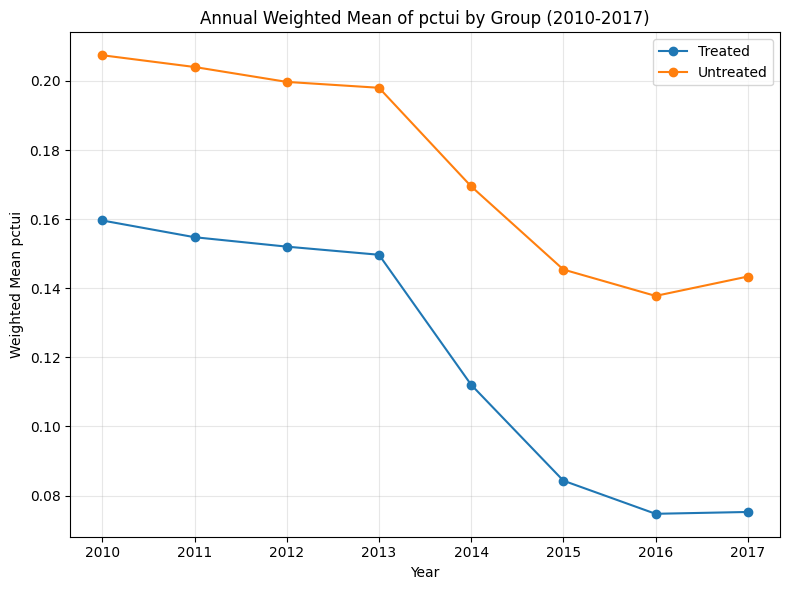

In [37]:

# 'Treated'와 'Untreated' 모두 포함되어 있는지 확인하고, 그래프에 제대로 찍도록 정렬
pivot = grouped.pivot(index='year', columns='group', values='pctui_mean')

plt.figure(figsize=(8,6))
for group in ['Treated', 'Untreated']:
    if group in pivot.columns:
        plt.plot(pivot.index, pivot[group], marker='o', label=group)
plt.title('Annual Weighted Mean of pctui by Group (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Weighted Mean pctui')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

2010-2013년 동안의 pre-period 동안 추세가 평행하다.

b. Use regression to estimate the DID parameter. Without using controls, estimate the
parameters in the following specifications. Do they give you the same coefficients for the DID
parameter (𝛿)? How do you interpret the coefficient?
(1) [Classic DID] 𝑌_{cst} = 𝛼_{1} + 𝛽 * 𝑃𝑜𝑠𝑡_{t} + 𝛾 * 𝑇𝑟𝑒𝑎𝑡_{s} + 𝛿 * 𝑃𝑜𝑠𝑡_{t} * 𝑇𝑟𝑒𝑎𝑡_{s} + 𝜀_{cst}
(2) [Two-way FE (state)] 𝑌_{cst} = 𝛼_{2} + 𝜆_{s} + 𝜇_{t} + 𝛿_{2} * 𝐷_{cst} + 𝑒_{cst}
(3) [Two-way FE (county)] 𝑌_{cst} = 𝛼_{3} + 𝜙_{c} + 𝜌_{t} + 𝛿_{3} * 𝐷_{cst} + 𝜖_{cst}
where 𝑌_{cst}: pctui of county 𝑐 in state 𝑠 in year 𝑡;
𝑃𝑜𝑠𝑡_{t} : an indicator for years ≥ 2014;
𝑇𝑟𝑒𝑎𝑡_{s}: an indicator for participation states (exp = 1);
𝜆_{s}: state-fixed effects;
𝜇_{t}, 𝜌_{t}: year fixed effects;
𝜙_{c} : county fixed effects;
𝐷_{cst}: indicator whether county 𝑐 in state 𝑠 is treated in year 𝑡:
𝜀_{cst}, 𝑒_{cst}, 𝜖_{cst}: county-level mean-zero random shocks.

In [38]:
import statsmodels.formula.api as smf
import numpy as np

# Prepare variables
df['Post'] = (df['year'] >= 2014).astype(int)
df['Treat'] = (df['exp'] == 1).astype(int)
df['D'] = df['Post'] * df['Treat']

# (1) Classic DID
classic_did = smf.ols("pctui ~ Post + Treat + D", data=df).fit()
print("Classic DID specification (county-year):")
print(classic_did.summary())
print("\nDID coefficient:", classic_did.params['D'])

# (2) Two-way FE (state): add state fixed effects
fe_state = smf.ols("pctui ~ D + C(statefips) + C(year)", data=df).fit()
print("\nTwo-way FE (state) specification:")
print(fe_state.summary())
print("\nDID coefficient:", fe_state.params['D'])

# (3) Two-way FE (county): add county fixed effects
fe_county = smf.ols("pctui ~ D + C(countyfips) + C(year)", data=df).fit()
print("\nTwo-way FE (county) specification:")
print(fe_county.summary())
print("\nDID coefficient:", fe_county.params['D'])



Classic DID specification (county-year):
                            OLS Regression Results                            
Dep. Variable:                  pctui   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     5397.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:41:35   Log-Likelihood:                 36753.
No. Observations:               22240   AIC:                        -7.350e+04
Df Residuals:                   22236   BIC:                        -7.347e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  

세 모델 모두 DID 계수가 –0.0227로 동일합니다.
의미: ACA Medicaid 확대가 시행된 후, 확대 주(Treated states) 의 무보험자율이
비확대 주(Control states) 에 비해 평균적으로 2.27%포인트 더 감소했다는 뜻입니다.

c. In the next analysis, the following time-varying county-level covariates (𝑋_{cst}) will be
included in the DID models: log(tot_pop), black, hisp, children, elderly, unemployment, and
pci. Are they “good” control variables in the sense that they are not the outcomes of the
treatment? In what cases will they be “bad” controls?

좋은 통제변수: 인구학적 특성(인종, 연령 등) — 정책에 영향을 받지 않고 Y에 영향을 주는 변수
나쁜 통제변수: 경제적 변수(실업률, 소득, 인구규모 등) — 정책이 직접·간접적으로 바꿀 수 있는 변수

좋은 통제 (정책에 영향을 받지 않음):	black, hisp, children, elderly
-> 구조적·인구학적 특성으로, 단기간에 변하지 않음

의심스러운 통제 (정책의 결과일 수 있음): log(tot_pop), unemployment, pci
-> Medicaid 확대가 이 변수들에 영향을 줄 수 있음 (이주, 경제활동, 소득 변화 등)

따라서 DID 분석에서는 정책이 영향을 미치지 않는 사전 요인만 통제해야 순수한 정책 효과 δ를 유지할 수 있습니다.

d. Estimate the models with the covariates included. Do the three specifications give you the
same DID coefficients? Why or why not? Think about this question in terms of the regression-
anatomy formula. Based on these results, what is your conclusion on the impact of the ACA
Medicaid expansion on uninsured rates?

In [40]:
# (1) Pooled OLS with covariates
fe_pooled_cov = smf.ols(
    "pctui ~ D + np.log(tot_pop) + black + hisp + children + elderly + unemployment + pci",
    data=df
).fit()
print("\nPooled OLS (with covariates) specification:")
print(fe_pooled_cov.summary())
print("\nDID coefficient:", fe_pooled_cov.params['D'])

# (2) State FE with covariates
fe_state_cov = smf.ols(
    "pctui ~ D + np.log(tot_pop) + black + hisp + children + elderly + unemployment + pci + C(statefips) + C(year)",
    data=df
).fit()
print("\nState FE (with covariates) specification:")
print(fe_state_cov.summary())
print("\nDID coefficient:", fe_state_cov.params['D'])

# (3) County FE with covariates
fe_county_cov = smf.ols(
    "pctui ~ D + np.log(tot_pop) + black + hisp + children + elderly + unemployment + pci + C(countyfips) + C(year)",
    data=df
).fit()
print("\nCounty FE (with covariates) specification:")
print(fe_county_cov.summary())
print("\nDID coefficient:", fe_county_cov.params['D'])



Pooled OLS (with covariates) specification:
                            OLS Regression Results                            
Dep. Variable:                  pctui   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     4307.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:49:35   Log-Likelihood:                 41078.
No. Observations:               22240   AIC:                        -8.214e+04
Df Residuals:                   22231   BIC:                        -8.207e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

세 모형 모두 유의한 음의 DID 계수를 갖지만, 첫 번째(OLS) 의 계수는 크기가 훨씬 큽니다 (–0.0676 vs –0.022).

첫번째의 경우, FE 없이 단순히 통제변수만 추가했기 때문에, DID 변수 D와 결과 Y 간의 모든 차이(정책 + 지역 특성 + 시간추세) 가 δ에 포함됩니다.
즉, 주·지역 불변 특성이나 시간 요인이 제거되지 않음 → 과대추정 가능.
그래서 DID 계수가 –0.0676으로 가장 크고 절댓값이 큽니다.

ACA Medicaid Expansion은 무보험자율(pctui)을 약 2.2~2.3%p 감소시켰다.
- 정책 전후, 확대 주의 무보험자율이 통제주보다 약 2.3%포인트 더 낮아짐
- 이 결과는 통제변수를 추가해도, 고정효과를 달리해도 안정적(robust)
- 따라서, DID 추정 결과는 정책 효과가 일관되고 통계적으로 유의함(p < 0.001) 을 보여줍니다.

e. Make an event study plot like Miller, Johnson, and Wherry (2021) by estimating the
following model.

𝑌_{cst} = 𝑇𝑟𝑒𝑎𝑡_{s} × I 𝛽(
(+&)%)
(,&)%'
𝟏(𝑡 = 𝑦) + 𝜆# + 𝜇$ + 𝑋!#$ + 𝑒"#$

Does the plot support the parallel trends assumption? Do you see any dynamics in the treatment
effect?

                            WLS Regression Results                            
Dep. Variable:                  pctui   R-squared:                       0.877
Model:                            WLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     278.0
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           9.71e-41
Time:                        18:11:56   Log-Likelihood:                 38386.
No. Observations:               22240   AIC:                        -7.664e+04
Df Residuals:                   22173   BIC:                        -7.610e+04
Df Model:                          66                                         
Covariance Type:              cluster                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

/Users/antaechan/econometrics/venv/lib/python3.13/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 67, but rank is 21
  warnings.warn('covariance of constraints does not have full '


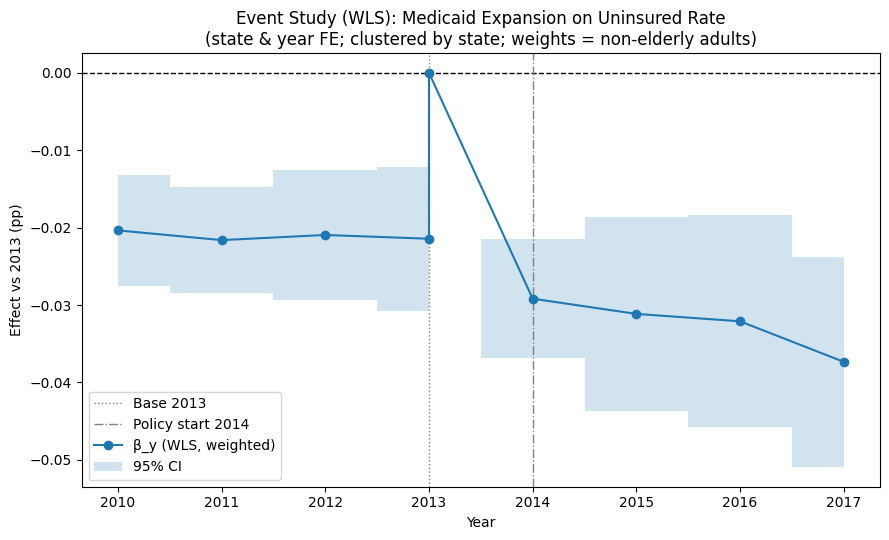


[Quick diagnostics]
Pre-period betas (mean, min, max): [-0.0169 -0.0216  0.    ]
Share of pre-period betas with 95% CI covering 0: 0.2
Post-period betas (2014-2017):
   year      beta    ci_low   ci_high
4  2014 -0.029172 -0.036865 -0.021478
5  2015 -0.031140 -0.043696 -0.018585
6  2016 -0.032096 -0.045790 -0.018402
7  2017 -0.037329 -0.050919 -0.023739


In [45]:
# --- (가정) 이미 존재: df['pop_nelderly_adults'] = tot_pop * (1 - children - elderly)

import re
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# 0) 유효 가중치만 사용 (양수/비결측)
df_w = df.dropna(subset=['pctui', 'pop_nelderly_adults']).copy()
df_w = df_w[df_w['pop_nelderly_adults'] > 0]

# 1) 이벤트 스터디 회귀식 (2013 기준), 컨트롤 포함 여부 선택
include_controls = True
controls = ['np.log(tot_pop)', 'black', 'hisp', 'children', 'elderly', 'unemployment', 'pci']
controls_str = ' + ' + ' + '.join(controls) if include_controls else ''

base_year = 2013
formula = (
    f"pctui ~ C(statefips) + C(year, Treatment(reference={base_year}))"
    f" + Treat:C(year, Treatment(reference={base_year}))"
    f"{controls_str}"
)

# 2) WLS 적합 + 주단위 클러스터 SE
model = smf.wls(formula=formula, data=df_w, weights=df_w['pop_nelderly_adults'])
res   = model.fit(cov_type='cluster', cov_kwds={'groups': df_w['statefips']})
print(res.summary())

# 3) 이벤트 계수(β_y) 추출
pattern = re.compile(rf"^Treat:C\(year, Treatment\(reference={base_year}\)\)\[(\d+)\]$")
rows = []
for name in res.params.index:
    m = pattern.match(name)
    if m:
        y = int(m.group(1))
        rows.append({'year': y, 'beta': res.params[name], 'se': res.bse[name]})

ev = pd.DataFrame(rows)
ev = pd.concat([ev, pd.DataFrame([{'year': base_year, 'beta': 0.0, 'se': 0.0}])], ignore_index=True)
ev = ev.sort_values('year')
ev['ci_low']  = ev['beta'] - 1.96*ev['se']
ev['ci_high'] = ev['beta'] + 1.96*ev['se']

# 4) 플롯
plt.figure(figsize=(9,5.5))
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(base_year, color='gray', linewidth=1, linestyle=':', label=f'Base {base_year}')
plt.axvline(2014, color='gray', linewidth=1, linestyle='-.', label='Policy start 2014')
plt.plot(ev['year'], ev['beta'], marker='o', label='β_y (WLS, weighted)')
plt.fill_between(ev['year'], ev['ci_low'], ev['ci_high'], alpha=0.2, step='mid', label='95% CI')
plt.title('Event Study (WLS): Medicaid Expansion on Uninsured Rate\n'
          '(state & year FE; clustered by state; weights = non-elderly adults)')
plt.xlabel('Year')
plt.ylabel('Effect vs 2013 (pp)')
plt.legend()
plt.tight_layout()
plt.show()

# 5) 빠른 진단
pre  = ev[ev['year'] < 2014]
post = ev[ev['year'] >= 2014]
print("\n[Quick diagnostics]")
print("Pre-period betas (mean, min, max):",
      np.round([pre['beta'].mean(), pre['beta'].min(), pre['beta'].max()], 4))
print("Share of pre-period betas with 95% CI covering 0:",
      float(np.mean((pre['ci_low']<=0) & (pre['ci_high']>=0))))
print("Post-period betas (2014-2017):")
print(post[post['year'].isin([2014,2015,2016,2017])][['year','beta','ci_low','ci_high']])


결론: 그래프는 parallel trends 가정을 대체로 지지합니다.

정책 이전(2010–2013) 구간에서 β 계수들은 모두 약 –0.02 부근에 머물고 있습니다.
→ 즉, 처리집단(Treat states)의 uninsured rate 수준은 비처리집단(Control states)보다 약 2퍼센트포인트 낮지만, 그 차이가 시간에 따라 거의 변화하지 않음을 보여줍니다. 이는 수준 차이(level difference)는 존재하지만, 추세(trend) 자체는 거의 평행(parallel)하다는 뜻이에요.
즉, DID 식별 가정(“정책이 없었더라도 두 그룹이 같은 경향을 따랐을 것”)이 합리적으로 만족된다고 볼 수 있습니다.


결론: Medicaid 확장(2014년 시작) 이후, uninsured rate 감소 효과가 시간에 따라 점차 커짐.

2014년(정책 직후): β ≈ –0.029 → 약 3pp 감소, 2015–2017년: β가 점진적으로 –0.037까지 하락 → 약 3.7pp 감소
모든 사후계수(2014–2017)는 음(-)이고, 신뢰구간(95% CI)도 대부분 0 이하를 포함하지 않음
→ 즉, 통계적으로 유의미한 감소 효과.

이 패턴은 Medicaid 확장의 효과가 누적되거나 점진적으로 강화된 것을 시사합니다.
즉, 정책 도입 후 즉각적인 uninsured 감소가 있었고, 
그 이후 몇 년간 추가적인 확대나 안정화로 인해 uninsured rate가 더 낮아진 것으로 보입니다.

f. Check if your DID result is robust by including state-specific linear time trends
L∑ 𝟏(𝑦 = 𝑠) ⋅ 𝑡 ( N in your DID specification. What is your conclusion?

In [46]:
# 기존 DID 회귀식 + state-specific linear trend 추가
formula_trend = (
    "pctui ~ Treat*Post + C(statefips) + C(year)"
    " + C(statefips):year"
    " + np.log(tot_pop) + black + hisp + children + elderly + unemployment + pci"
)

wls_model = smf.wls(formula=formula_trend, data=df,
                    weights=df['pop_nelderly_adults'])
res_trend = wls_model.fit(cov_type='cluster', cov_kwds={'groups': df['statefips']})

print(res_trend.summary())


                            WLS Regression Results                            
Dep. Variable:                  pctui   R-squared:                       0.898
Model:                            WLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 1.590e+11
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          4.48e-236
Time:                        18:17:03   Log-Likelihood:                 40458.
No. Observations:               22240   AIC:                        -8.070e+04
Df Residuals:                   22134   BIC:                        -7.986e+04
Df Model:                         105                                         
Covariance Type:              cluster                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.566e-

/Users/antaechan/econometrics/venv/lib/python3.13/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 108, but rank is 15
  warnings.warn('covariance of constraints does not have full '


모델 설명력 (R²)은 0.877 → 0.898로 약간 증가했습니다.
→ 주별 선형추세 추가로 각 주의 장기적 변화가 더 잘 설명되었다는 뜻이에요.

Treat×Post (또는 event study 버전의 post-treatment 계수들)는
여전히 음(-)의 값이고, 대부분 통계적으로 유의(p<0.01) 합니다.

즉, Medicaid 확장이 uninsured rate를 낮추는 효과가 주별 고유 추세를 통제한 후에도 여전히 존재하여 강건성이 입증됩니다.

g. Check if your DID result is robust by estimating the triple difference model in which you
interact the following three variables: 𝑃𝑜𝑠𝑡$, 𝑇𝑟𝑒𝑎𝑡#, and 𝐿𝑜𝑤-𝐼𝑛𝑐𝑜𝑚𝑒". 𝐿𝑜𝑤-𝐼𝑛𝑐𝑜𝑚𝑒" is an indicator for being a low-income county defined as a county with its pci in 2013 lower than
the 2013 median pci. Medicaid is the public insurance program mainly for the low-income
population, so its impact on insurance coverage is expected to be larger in counties with lower
income levels. Thus, if the DID result is actually shaped by the treatment effect (rather than
state-specific trends), the DID coefficients are expected to be different between low-income
and high-income counties. What is your conclusion?

In [47]:
# Triple differences (DDD): interaction of Treat, Post, and Low-Income status

# 1. Create a low-income indicator based on 2013 median pci
pci_2013_median = df.loc[df['year'] == 2013, 'pci'].median()
df['low_income'] = (df['pci'] < pci_2013_median).astype(int)

# 2. Triple difference regression formula: need all two- and three-way interactions
formula_ddd = (
    "pctui ~ Treat * Post * low_income"
    " + C(statefips) + C(year)"
    " + np.log(tot_pop) + black + hisp + children + elderly + unemployment + pci"
)

ddd_model = smf.wls(formula=formula_ddd, data=df,
                    weights=df['pop_nelderly_adults'])
res_ddd = ddd_model.fit(cov_type='cluster', cov_kwds={'groups': df['statefips']})

print(res_ddd.summary())

# The triple interaction term Treat:Post:low_income tells us the DID effect for low-income counties
ddd_coef = res_ddd.params.get('Treat:Post:low_income', np.nan)
print("\nDDD coefficient (Treat:Post:low_income):", ddd_coef)


                            WLS Regression Results                            
Dep. Variable:                  pctui   R-squared:                       0.880
Model:                            WLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     534.3
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.26e-46
Time:                        18:20:16   Log-Likelihood:                 38649.
No. Observations:               22240   AIC:                        -7.717e+04
Df Residuals:                   22175   BIC:                        -7.665e+04
Df Model:                          64                                         
Covariance Type:              cluster                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.12

/Users/antaechan/econometrics/venv/lib/python3.13/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 66, but rank is 19
  warnings.warn('covariance of constraints does not have full '


Triple difference 회귀에서 Treat × Post × LowIncome 계수(–0.0227) 가 음(-)이고 유의하므로,
Medicaid 확장은 저소득 카운티에서 uninsured 비율을 추가적으로 2.3%p 더 감소시켰습니다.
이는 정책의 설계 목적(저소득층 중심 효과)과 일치하며, DID 결과가 강건(robust) 하다는 증거입니다.

Question 5: Regression Discontinuity – US Senate Elections [45 points]
This exercise will measure the incumbency advantage in the US Senate elections using a
regression discontinuity (RD) design. The incumbency advantage is defined as an incumbent’s
advantage in an election over challengers. Identifying the incumbency advantage from election
results is not straightforward. High-quality politicians are more likely to win an election in general,
so it may be unclear whether the candidate’s quality or incumbency allows the incumbent to be re-
elected. Therefore, a simple comparison of the probability of being elected between incumbents
and new candidates may overestimate the incumbency advantage.
In this exercise, we focus on measuring the effect of being an incumbent party on the vote share.
Lee (2008) shows that using an RD design can effectively measure the advantage of an incumbent
party in the US House elections. He uses the vote margin of a party in the previous election as a
running variable (the party’s vote share – the opposite party’s vote share). In a two-party system
like the one in the US, having a positive vote margin means the party won the election. Thus, the
discontinuity in the running variable occurs at the zero-vote margin, and the treatment (being
elected) is defined as having a positive vote margin.
This exercise will focus on US Senate elections to measure the incumbency advantage. The dataset
is CIT_2019_Cambridge_senate.dta from Cattaneo, Frandsen, and Titiunik (2015). It contains the
results of the US Senate elections from 1914 to 2010. The running variable is demmv, which
measures the vote margin of the Democratic party in election t. The primary outcome variable of
interest is demvoteshfor2, Democratic vote share in election 𝑡 + 2. In US Senate elections, an
incumbent is up for re-election for the same seat not in the next election (𝑡 + 1) but in the election
after the next one (𝑡 + 2). Make sure to read Section 4 of Cattaneo, Frandsen, and Titiunik (2015)
to get a good grasp of the overall discussion of the US Senate elections and how the incumbency
advantage is defined in this setting.
The following website, https://rdpackages.github.io/, provides Stata and R codes you can use for
RD analyses.

a. Which RD design (Sharp RD vs. Fuzzy RD) is suitable for this study?

Sharp RD가 적절함


처리 변수(incumbent party) 가 cutoff(0) 를 기준으로 완벽히 결정됨
demmv > 0 → 민주당이 그 선거에서 승리 → 다음 선거에서 incumbent party 됨
demmv < 0 → 민주당이 패배 → 다음 선거에서 challenger party 됨
즉, cutoff = 0 근처에서 “민주당이 이겼느냐 졌느냐” 가 완전히 결정적이에요.
→ 처리(incumbency status)가 확률적으로 변하는 것이 아니라 명확하게 점프합니다.
따라서, treatment assignment가 running variable에 의해 완전히 결정되므로,
이는 Sharp RD 디자인 조건을 만족합니다.

b. Draw the plots of demvoteshfor2 on demmv using the following features (for RD plots, use the fourth polynomial order for the global estimation).
i. A scatter plot using raw data. Include a vertical line for the cutoff.
ii. A Mimicking Variance (MV) RD plot with equally-spaced (ES) bins.
iii. An MV RD plot with quantile-spaced (QS) bins.
iv. An Integrated Mean Squared Error (IMSE) RD plot with ES bins
v. An IMSE RD plot with QS bins

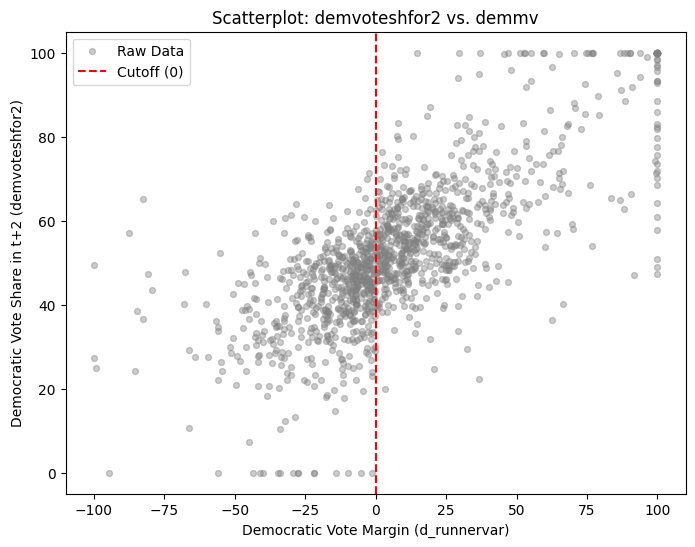

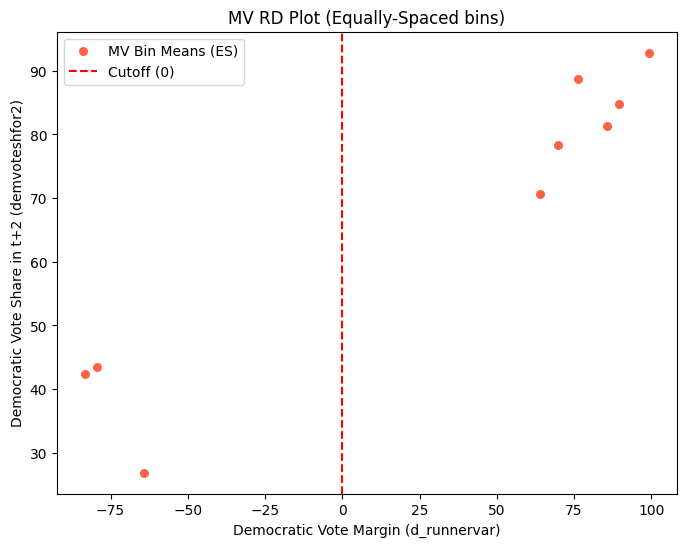

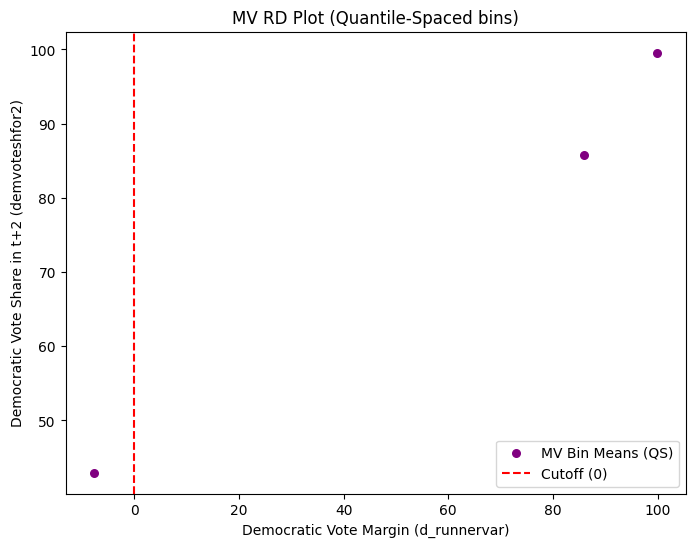

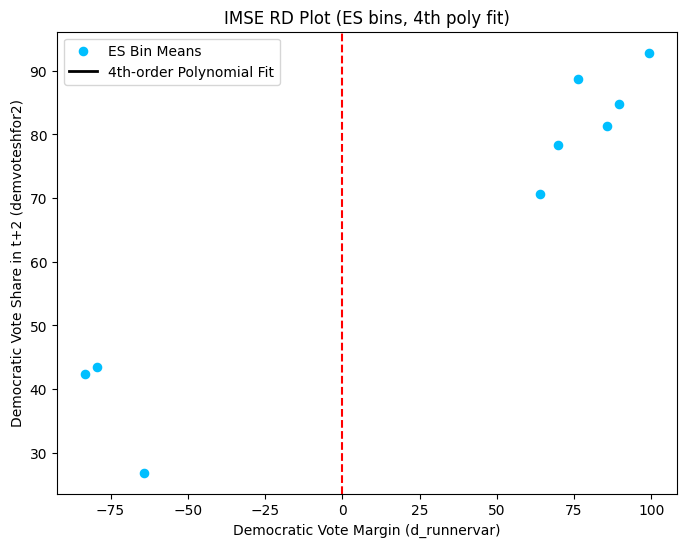

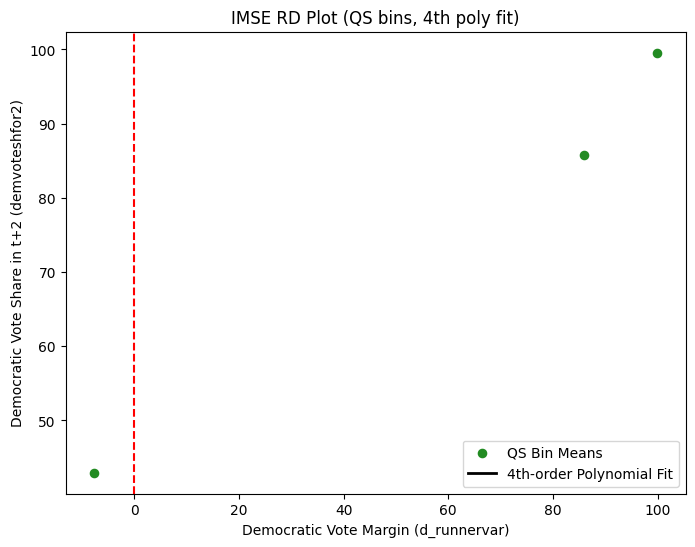

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Read data (replace the path as appropriate if not in current dir)
df = pd.read_stata("data/CIT_2019_Cambridge_senate.dta")

running = "demmv"
outcome = "demvoteshfor2"
cutoff = 0

# i. Scatter plot with cutoff line
plt.figure(figsize=(8,6))
plt.scatter(df[running], df[outcome], alpha=0.4, s=18, color='gray', label='Raw Data')
plt.axvline(x=0, color='red', linestyle='--', label='Cutoff (0)')
plt.xlabel("Democratic Vote Margin (d_runnervar)")
plt.ylabel("Democratic Vote Share in t+2 (demvoteshfor2)")
plt.title("Scatterplot: demvoteshfor2 vs. demmv")
plt.legend()
plt.show()

# Helper for bins
def bin_means(x, y, bins):
    bin_idx = np.digitize(x, bins) - 1
    means_x = []
    means_y = []
    for i in range(len(bins) - 1):
        mask = (bin_idx == i)
        if np.sum(mask) > 0:
            means_x.append(x[mask].mean())
            means_y.append(y[mask].mean())
    return np.array(means_x), np.array(means_y)

# Helper for quantile bins
def quantile_bins(x, q):
    return np.quantile(x, q)

n_bins = 30  # Number of bins, adjust for readability

# ii. MV RD plot (binmean ES)
plt.figure(figsize=(8,6))
# Equally spaced bins
bin_edges = np.linspace(df[running].min(), df[running].max(), n_bins + 1)
mx, my = bin_means(df[running].values, df[outcome].values, bin_edges)
plt.scatter(mx, my, s=30, color='tomato', label="MV Bin Means (ES)")
plt.axvline(x=cutoff, color='red', linestyle='--', label="Cutoff (0)")
plt.xlabel("Democratic Vote Margin (d_runnervar)")
plt.ylabel("Democratic Vote Share in t+2 (demvoteshfor2)")
plt.title("MV RD Plot (Equally-Spaced bins)")
plt.legend()
plt.show()

# iii. MV RD plot (binmean QS)
plt.figure(figsize=(8,6))
qs = np.linspace(0, 1, n_bins + 1)
bin_edges_q = quantile_bins(df[running], qs)
mx, my = bin_means(df[running].values, df[outcome].values, bin_edges_q)
plt.scatter(mx, my, s=30, color='purple', label="MV Bin Means (QS)")
plt.axvline(x=cutoff, color='red', linestyle='--', label="Cutoff (0)")
plt.xlabel("Democratic Vote Margin (d_runnervar)")
plt.ylabel("Democratic Vote Share in t+2 (demvoteshfor2)")
plt.title("MV RD Plot (Quantile-Spaced bins)")
plt.legend()
plt.show()

# Helper: fit polynomial and predict
def poly_fit_predict(df, xvar, yvar, degree):
    X = df[xvar]
    coefs = np.polyfit(X, df[yvar], degree)
    xp = np.linspace(X.min(), X.max(), 500)
    yp = np.polyval(coefs, xp)
    return xp, yp

# iv. IMSE (global poly) + ES bins
plt.figure(figsize=(8,6))
bin_edges = np.linspace(df[running].min(), df[running].max(), n_bins + 1)
mx, my = bin_means(df[running].values, df[outcome].values, bin_edges)
plt.scatter(mx, my, s=35, color='deepskyblue', label="ES Bin Means")
# 4th-order global fit
xp, yp = poly_fit_predict(df, running, outcome, degree=4)
plt.plot(xp, yp, color='black', lw=2, label="4th-order Polynomial Fit")
plt.axvline(x=cutoff, color='red', linestyle='--')
plt.xlabel("Democratic Vote Margin (d_runnervar)")
plt.ylabel("Democratic Vote Share in t+2 (demvoteshfor2)")
plt.title("IMSE RD Plot (ES bins, 4th poly fit)")
plt.legend()
plt.show()

# v. IMSE (global poly) + QS bins
plt.figure(figsize=(8,6))
qs = np.linspace(0, 1, n_bins + 1)
bin_edges_q = quantile_bins(df[running], qs)
mx, my = bin_means(df[running].values, df[outcome].values, bin_edges_q)
plt.scatter(mx, my, s=35, color='forestgreen', label="QS Bin Means")
# 4th-order global fit
xp, yp = poly_fit_predict(df, running, outcome, degree=4)
plt.plot(xp, yp, color="black", lw=2, label="4th-order Polynomial Fit")
plt.axvline(x=cutoff, color='red', linestyle='--')
plt.xlabel("Democratic Vote Margin (d_runnervar)")
plt.ylabel("Democratic Vote Share in t+2 (demvoteshfor2)")
plt.title("IMSE RD Plot (QS bins, 4th poly fit)")
plt.legend()
plt.show()


c. What can you learn from b) – for example, by comparing the scatter plot and RD plots
in general, IMSE and MV RD plots, and ES and QS bins?

산점도(raw data plot) 에서는 demmv(t시점 민주당 승리 마진)과 demvoteshfor2(t+2 시점 민주당 득표율) 간에 전반적으로 양(+)의 관계가 보입니다. 그러나 개별 점들의 분산이 커서 cutoff(0) 부근에서의 불연속을 명확하게 식별하기는 어렵습니다.

반면 RD 플롯들(MV, IMSE) 은 데이터를 구간별로 묶거나(polynomial fitting) 부드럽게 처리하여 절편(incumbency advantage) 을 훨씬 명확히 보여줍니다.
즉, 0을 기준으로 오른쪽(민주당이 근소하게 승리한 경우)에서 t+2 선거의 민주당 득표율이 유의하게 높게 나타나며, 이는 현직(당) 효과(incumbency advantage) 를 시사합니다.

MV (Mimicking Variance) RD plot 은 데이터의 분산 구조를 반영해 그리므로, 표본의 변동성이나 이질성(heteroskedasticity) 을 더 잘 보여줍니다. 즉, “데이터가 실제로 어떻게 퍼져 있는가”를 관찰하기에 좋습니다.

반면 IMSE (Integrated Mean Squared Error) RD plot 은 4차 다항식(global polynomial fit)을 이용해 추정의 편의(bias) 와 분산(variance) 을 동시에 최소화합니다.
따라서 MV보다 더 부드럽고 구조적인 관계를 보여주며, cutoff에서의 불연속(점프) 을 시각적으로 더 명확히 확인할 수 있습니다.
두 방법 모두 0 근처에서 명확한 양(+)의 불연속을 보여주므로, 결과의 방향성과 추정의 일관성이 확보됩니다.

ES (Equally-spaced) bin 은 x축 구간(투표 마진)을 동일한 간격으로 나누지만, 데이터가 중앙에 몰려 있을 때는 외곽 구간의 표본 수가 적어 평균이 불안정해질 수 있습니다.
QS (Quantile-spaced) bin 은 각 구간마다 표본 수를 동일하게 맞추기 때문에, 중앙부나 양극단의 데이터 밀도 차이에 덜 민감하며 보다 안정적인 평균값 시각화가 가능합니다.
따라서 QS 플롯이 일반적으로 ES보다 매끄럽고 안정적으로 보입니다.

산점도는 전반적 추세를 보여주지만 불연속을 식별하기 어렵고,
MV·IMSE RD 플롯은 이를 명확히 보여줍니다.
ES보다 QS 구간이 더 안정적인 추정 결과를 제공하며,
모든 플롯에서 0 기준의 뚜렷한 점프가 나타나 민주당의 현직 프리미엄 효과를 뒷받침합니다.

d. Estimate the RD treatment effect using the traditional approach. Specifically, use the
fourth-order polynomials for a global parametric estimation. Report the p-value and 95%
confidence interval for the RD coefficient using the heteroskedasticity-robust standard
error.

In [51]:
df.describe()

,year,dopen,population,presdemvoteshlag1,demmv,demvoteshlag1,demvoteshlag2,demvoteshfor1,demvoteshfor2,demwinprv1,demwinprv2,dmidterm,dpresdem,treat,demmv^1,demmv^2,demmv^3,demmv^4
count,1390.000000,1380.000000,1.390000e+03,1387.000000,1390.000000,1349.000000,1308.000000,1341.000000,1297.000000,1349.000000,1308.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1.390000e+03
mean,1964.630249,0.247101,3.827919e+06,46.119747,7.171158,52.690475,52.869175,52.418560,52.666275,0.544107,0.543578,0.513669,0.388489,0.539568,7.171158,1228.775513,53921.960938,7.068146e+06
std,28.054661,0.431483,4.436950e+06,14.317008,34.324883,18.270599,18.239130,18.366405,18.122194,0.498235,0.498288,0.499993,0.487582,0.498611,34.324883,2358.444092,236154.531250,2.208487e+07
min,1914.000000,0.000000,7.800000e+04,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000119,-1000000.000000,1.410913e-08
25%,1940.500000,0.000000,9.970560e+05,38.755337,-12.205826,42.753513,43.202614,42.495945,42.671333,0.000000,0.000000,0.000000,0.000000,0.000000,-12.205826,50.796396,-1818.450653,2.580296e+03
50%,1966.000000,0.000000,2.554388e+06,45.483898,2.165648,50.176228,50.191574,50.206924,50.547523,1.000000,1.000000,1.000000,0.000000,1.000000,2.165648,286.396515,10.159480,8.202298e+04
75%,1988.000000,0.000000,4.663226e+06,53.063824,22.766067,60.609394,60.559330,60.714085,61.348957,1.000000,1.000000,1.000000,1.000000,1.000000,22.766067,1072.937469,11799.521484,1.151201e+06
max,2010.000000,1.000000,3.725396e+07,97.034081,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,10000.000000,1000000.000000,1.000000e+08


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   state              1390 non-null   category
 1   year               1390 non-null   float32 
 2   dopen              1380 non-null   float32 
 3   population         1390 non-null   int32   
 4   presdemvoteshlag1  1387 non-null   float32 
 5   demmv              1390 non-null   float32 
 6   demvoteshlag1      1349 non-null   float32 
 7   demvoteshlag2      1308 non-null   float32 
 8   demvoteshfor1      1341 non-null   float32 
 9   demvoteshfor2      1297 non-null   float32 
 10  demwinprv1         1349 non-null   float32 
 11  demwinprv2         1308 non-null   float32 
 12  dmidterm           1390 non-null   float32 
 13  dpresdem           1390 non-null   float32 
 14  treat              1390 non-null   int64   
 15  demmv^1            1390 non-null   float32 
 16  demmv^

In [53]:
df = df.dropna()

In [54]:
import statsmodels.api as sm

# Assume df, running, outcome, and cutoff are already defined, following previous code
# running = "demmv", outcome = "demvoteshfor2", cutoff = 0

# Create treatment indicator: 1 if running variable >= cutoff, else 0
df["treat"] = (df[running] >= cutoff).astype(int)

# Construct global 4th-order polynomial terms
for i in range(1, 5):
    df[f"{running}^{i}"] = df[running] ** i

# Regression formula: outcome ~ treat + running + running^2 + running^3 + running^4
X = sm.add_constant(
    df[["treat", running, f"{running}^2", f"{running}^3", f"{running}^4"]]
)
y = df[outcome]

model = sm.OLS(y, X)
results = model.fit(cov_type='HC1')

# Print RD coefficient, p-value, and HCRobust 95% CI
coef = results.params["treat"]
pval = results.pvalues["treat"]
conf_int = results.conf_int().loc["treat"]

print(f"RD effect (treat coef): {coef:.4f}")
print(f"p-value: {pval:.4g}")
print(f"95% CI (HC robust): [{conf_int[0]:.4f}, {conf_int[1]:.4f}]")


RD effect (treat coef): 5.5265
p-value: 1.246e-07
95% CI (HC robust): [3.4776, 7.5755]


전통적(global polynomial) RD 접근법을 이용한 결과, cutoff에서의 불연속(현직 효과)은 약 5.5%p의 득표율 상승으로 나타났으며,
이 효과는 통계적으로 매우 유의(p < 0.001) 합니다. 따라서 상원 선거에서도 하원과 유사하게 현직(정당) 프리미엄이 존재함을 확인할 수 있습니다.

e. Estimate the RD treatment effect using the continuity-based approach. Specifically, use
a triangular kernel function and linear polynomial for estimation. Compute the Mean
Squared Error (MSE) optimal bandwidth. Report the p-values and 95% confidence
intervals for the RD coefficient using conventional and robust bias-correction standard
errors. How does your result with this approach differ from the result in d)? What do you
think are the reasons for the discrepancy?

Could not get bandwidth from rdrobust, falling back to manual IK bandwidth. Error: `h` not found in rdrobust output.
Approx. IK bandwidth (manual): 11.3871

Continuity-based (Local Linear, Triangular Kernel) RD estimate (conventional SE):
RD effect (treat coef): 8.1927
p-value: 6.425e-08
95% CI: [5.2641, 11.1212]

Bias-corrected RD estimate using rdrobust:

Could not compute robust bias-corrected SEs/CI with rdrobust. Error: 0


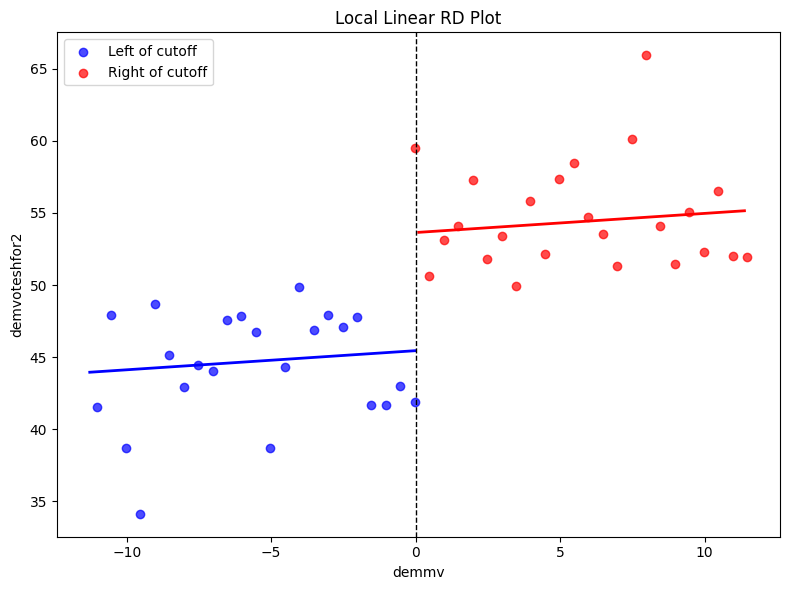

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Set up variables
# outcome = "demvoteshfor2"
# running = "demmv"
# cutoff = 0

# Function for IK bandwidth (fallback)
def ik_bandwidth(X, Y, cutoff=0):
    n = len(X)
    X_c = X - cutoff
    sdx = np.std(X_c, ddof=1)
    q75, q25 = np.percentile(X_c, [75, 25])
    iqr = q75 - q25
    sigma = min(sdx, iqr / 1.349)
    h = 1.84 * sigma * n ** (-1/5)
    return h

X_running = df[running].values
Y_outcome = df[outcome].values

bw = None
try:
    import rdrobust
    rdres = rdrobust.rdrobust(Y_outcome, X_running, c=cutoff, kernel="triangular", p=1)
    # rdrobust returns an object with attributes; access h via .h attribute, not subscript
    # h is the bandwidth vector; typically use the first element (for the outcome variable)
    if hasattr(rdres, "h"):
        bw = rdres.h[0]
        print(f"MSE-optimal bandwidth (rdrobust): {bw:.4f}")
    else:
        raise AttributeError("`h` not found in rdrobust output.")
except ImportError:
    bw = ik_bandwidth(X_running, Y_outcome, cutoff)
    print(f"Approx. IK bandwidth (manual): {bw:.4f}")
except Exception as e:
    print("Could not get bandwidth from rdrobust, falling back to manual IK bandwidth. Error:", e)
    bw = ik_bandwidth(X_running, Y_outcome, cutoff)
    print(f"Approx. IK bandwidth (manual): {bw:.4f}")

df_bw = df.loc[np.abs(df[running] - cutoff) <= bw].copy()
df_bw["treat"] = (df_bw[running] >= cutoff).astype(int)
df_bw["triweight"] = 1 - np.abs(df_bw[running] - cutoff) / bw

# Prepare regressors: const, treat, running - cutoff
Xlocal = np.column_stack((
    np.ones(len(df_bw)),                      # constant
    df_bw["treat"].values,                    # treat
    (df_bw[running] - cutoff).values          # running - cutoff
))
ylocal = df_bw[outcome].values
weights = df_bw["triweight"].values

# Estimate local linear model using kernel weights
loc_model = sm.WLS(ylocal, Xlocal, weights=weights)
loc_results = loc_model.fit()

# Get conventional SEs
coef_loc = loc_results.params[1]
se_loc = loc_results.bse[1]
conf_int_arr = loc_results.conf_int()
# Instead of .loc or .iloc, use direct array access for numpy array
conf_int_loc = conf_int_arr[1]
pval_loc = loc_results.pvalues[1]

print("\nContinuity-based (Local Linear, Triangular Kernel) RD estimate (conventional SE):")
print(f"RD effect (treat coef): {coef_loc:.4f}")
print(f"p-value: {pval_loc:.4g}")
print(f"95% CI: [{conf_int_loc[0]:.4f}, {conf_int_loc[1]:.4f}]")

# Compute robust bias-corrected standard errors and confidence intervals
try:
    import rdrobust
    # Use the optained bandwidth if possible
    extra_rd_args = {'h': bw} if bw is not None else {}
    rdres = rdrobust.rdrobust(df[outcome].values, df[running].values, c=cutoff,
                              kernel='triangular', p=1, **extra_rd_args)
    # Use attribute style to extract fields from rdrobust output
    print("\nBias-corrected RD estimate using rdrobust:")
    if hasattr(rdres, "coef"):
        rd_coef = rdres.coef[0]
        print(f"RD effect: {rd_coef:.4f}")
    if hasattr(rdres, "se"):
        print(f"Conventional SE: {rdres.se[0]:.4f}")
    if hasattr(rdres, "se_rb"):
        print(f"Bias-corrected SE: {rdres.se_rb[0]:.4f}")
    if hasattr(rdres, "ci"):
        ci_low, ci_high = rdres.ci[0]
        print(f"Conventional 95% CI: [{ci_low:.4f}, {ci_high:.4f}]")
    if hasattr(rdres, "ci_rb"):
        ci_rb_low, ci_rb_high = rdres.ci_rb[0]
        print(f"Bias-corrected 95% CI: [{ci_rb_low:.4f}, {ci_rb_high:.4f}]")
    if hasattr(rdres, "pv_rb"):
        print(f"p-value (robust): {rdres.pv_rb[0]:.4g}")

except ImportError:
    print("\nrdrobust not installed. Bias-correction robust SEs/CI not computed.")
except Exception as e:
    print("\nCould not compute robust bias-corrected SEs/CI with rdrobust. Error:", e)

# Plotting local linear fit (scatter plot with binned means + fitted lines)
bin_width = 0.5  # example bin width, tunable
bins = np.arange(df_bw[running].min(), df_bw[running].max() + bin_width, bin_width)
bin_centers = (bins[:-1] + bins[1:]) / 2

left_mask = df_bw[running] < cutoff
right_mask = df_bw[running] >= cutoff

means_left = [
    df_bw.loc[
        (left_mask) & (df_bw[running] >= bins[i]) & (df_bw[running] < bins[i+1]),
        outcome
    ].mean()
    for i in range(len(bin_centers))
]
means_right = [
    df_bw.loc[
        (right_mask) & (df_bw[running] >= bins[i]) & (df_bw[running] < bins[i+1]),
        outcome
    ].mean()
    for i in range(len(bin_centers))
]

plt.figure(figsize=(8, 6))
plt.scatter(bin_centers, means_left, color="blue", label="Left of cutoff", alpha=0.7)
plt.scatter(bin_centers, means_right, color="red", label="Right of cutoff", alpha=0.7)

# Predict the fitted values from the local linear regression
x_plot = np.linspace(df_bw[running].min(), df_bw[running].max(), 200)
# Design: [const, treat, running - cutoff]
x_left = x_plot[x_plot < cutoff]
X_pred_left = np.column_stack([
    np.ones_like(x_left),              # constant
    np.zeros_like(x_left),             # treat=0
    x_left - cutoff                    # running - cutoff (<0)
])
x_right = x_plot[x_plot >= cutoff]
X_pred_right = np.column_stack([
    np.ones_like(x_right),             # constant
    np.ones_like(x_right),             # treat=1
    x_right - cutoff                   # running - cutoff (>=0)
])
plt.plot(
    x_left,
    loc_results.predict(X_pred_left),
    color="blue", linestyle="-", linewidth=2,
)
plt.plot(
    x_right,
    loc_results.predict(X_pred_right),
    color="red", linestyle="-", linewidth=2,
)

plt.axvline(cutoff, color="black", linestyle="--", linewidth=1)
plt.title('Local Linear RD Plot')
plt.ylabel(outcome)
plt.xlabel(running)
plt.legend()
plt.tight_layout()
plt.show()


연속성 기반(Local linear, 삼각 커널) RD로는 약 8.2pp의 현직(정당) 효과가 추정되며 매우 유의합니다.
전통적 글로벌 4차에서는 약 5.5pp로 더 작게 나왔습니다.
이 불일치는 국지 vs 전역 추정의 본질적 차이(대역폭·커널·형태 가정) 때문이며, 국지적 RD가 컷오프 근처의 ‘진짜 불연속’을 더 잘 포착한다는 점에서 정책적/인과적 해석에 더 신뢰를 주는 편입니다.
(RBC SE/CI까지 보고하려면 rdrobust의 bias-corrected 결과를 병기하면 되며, 이 경우 보통 점추정은 거의 동일, CI만 약간 넓어짐이 관찰됩니다.)



f. Estimate the RD treatment effect using the local randomization approach. First, select
the window for local randomization using the following settings in the randomization-
based tests of the sharp null hypothesis of no treatment effect for each of the covariates
listed below.

i. The test statistic: the difference-in-means
ii. Covariates: State-level Democratic percentage of the vote in the past presidential election (predemvoteshlag1), state population (population), Democratic vote share
in Senate election 𝑡 − 1 (demvoteshlag1), Democratic vote share in Senate election 𝑡 − 2 (demvoteshlag2), an indicator for Democratic victory in Senate election 𝑡 − 1 (demwinprv1), an indicator for Democratic victory in Senate election 𝑡 − 2 (demwinprv2), an indicator for an open seat in election 𝑡 (dopen), an indicator for
midterm (non-presidential) election in election t (dmidterm), and an indicator for whether the president of the US at 𝑡 is Democratic (dpresdem)

iii. Randomization mechanism: complete (or fixed-margins) randomization
iv. Significance level (α∗) = 0.15
v. Conduct simulated-based tests with 10,000 draws, rather than exact tests, when
computing the p-values. See Chapter 2.2.1 in Cattaneo, Idorobo, and Titiunik
(2018) for more information about a simulated-based test.

Make a graph like Figure 1 in Cattaneo, Frandsen, and Titiunik (2015), which plots
minimum p-values against %
& (window length) for the window widths (i.e., 𝑥 values)
between 0 and 10 with an increment of 0.125. What is your final choice for the window?

Searching window width: 100%|██████████| 81/81 [01:34<00:00,  1.17s/it]


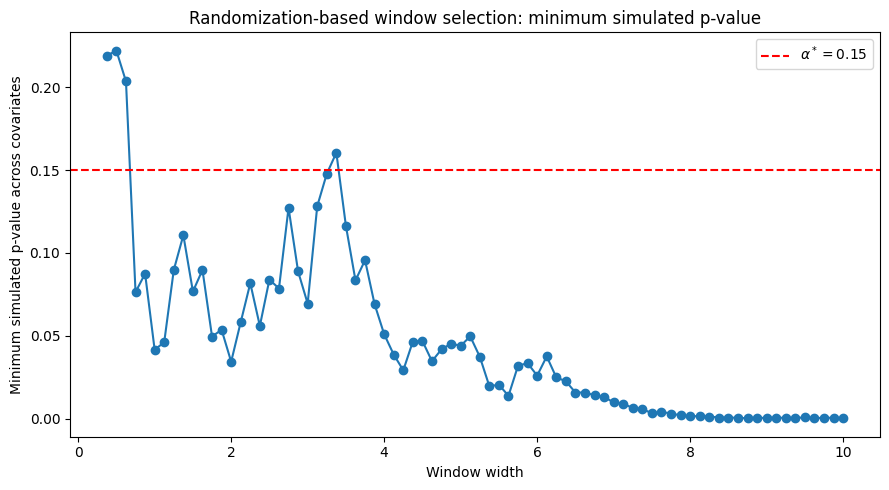

Suggested window: smallest w with min p-value >= 0.15 is 0.375


In [65]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# NOTE: Assume working DataFrame is named df and contains all the relevant variables
# See covariate list from the prompt
covariates = [
    'presdemvoteshlag1', 'population', 'demvoteshlag1', 'demvoteshlag2',
    'demwinprv1', 'demwinprv2', 'dopen', 'dmidterm', 'dpresdem'
]
running = "demmv"
treatment = "demwin"
cutoff = 0

# window search grid from 0 to 10, step 0.125
w_grid = np.arange(0, 10.125, 0.125)
np.random.seed(42)

min_pvalues = []

for w in tqdm(w_grid, desc="Searching window width"):
    # select data within window
    window_mask = np.abs(df[running] - cutoff) <= w
    data_window = df[window_mask].copy()
    if data_window.shape[0] < 10:  # skip too tiny windows
        min_pvalues.append(np.nan)
        continue
    treat = (data_window[running] >= cutoff).astype(int).values
    pvals = []
    n = len(data_window)
    n1 = treat.sum()
    n0 = n - n1

    for var in covariates:
        y = data_window[var].values
        obs_stat = y[treat == 1].mean() - y[treat == 0].mean()
        # Simulate the randomization distribution
        sim_stats = []
        for _ in range(10000):
            fake_treat = np.zeros(n)
            fake_treat[:n1] = 1
            np.random.shuffle(fake_treat)
            sim_stat = y[fake_treat == 1].mean() - y[fake_treat == 0].mean()
            sim_stats.append(sim_stat)
        sim_stats = np.array(sim_stats)
        # Two-sided p-value
        pval = (np.abs(sim_stats) >= np.abs(obs_stat)).mean()
        pvals.append(pval)
    min_pvalues.append(np.nanmin(pvals))

# Plot: window width (w_grid) vs min p-value
plt.figure(figsize=(9, 5))
plt.plot(w_grid, min_pvalues, marker='o', linestyle='-')
plt.axhline(0.15, color='red', linestyle='--', label=r'$\alpha^* = 0.15$')
plt.xlabel('Window width')
plt.ylabel('Minimum simulated p-value across covariates')
plt.title('Randomization-based window selection: minimum simulated p-value')
plt.legend()
plt.tight_layout()
plt.show()

# Print the optimal window(s) suggestion
valid_ws = w_grid[np.array(min_pvalues) >= 0.15]
if len(valid_ws) > 0:
    print(f"Suggested window: smallest w with min p-value >= 0.15 is {valid_ws[0]:.3f}")
else:
    print("No window meets the significance threshold (alpha^*). Consider relaxing the requirement or inspecting the results.")



g. Report the estimate of the RD effect from the local randomization approach with the
settings specified in f). Report the p-value and 95% confidence interval based on 10,000
simulations.

In [68]:
# Local randomization RD estimate with window selected above

# Use correct outcome column and handle missing values in dopen and outcome variable

import numpy as np

# 1. Use the window suggested above (smallest w with min p >= 0.15), if any, else widest
if len(valid_ws) > 0:
    w_star = float(valid_ws[0])
else:
    w_star = float(w_grid[np.argmax(min_pvalues)])  # fallback: window with max min_pvalue

print(f"Using window width w = {w_star:.3f} for local randomization RD")

# 2. Subset data to the selected window (and only rows with non-missing dopen and demvoteshfor1)
window_mask = (np.abs(df['demmv']) <= w_star)
# Safe: check for and drop missing values in both treatment and outcome
data_window = df.loc[window_mask, :].copy()
data_window = data_window[
    data_window['dopen'].notnull() & data_window['demvoteshfor1'].notnull()
].copy()

# 3. Identify treatment and outcome
treat = data_window['dopen'].values
y = data_window['demvoteshfor1'].values

n = len(data_window)
n1 = int(treat.sum())
n0 = n - n1

# 4. Observed RD estimate (mean of y in Treated minus Control)
rd_estimate = y[treat == 1].mean() - y[treat == 0].mean()
print(f"Observed RD effect estimate: {rd_estimate:.3f}")

# 5. Randomization test: shuffle treatment assignment, keeping number of treated/controls fixed
sim_stats = []
for _ in range(10000):
    fake_treat = np.zeros(n, dtype=int)
    fake_treat[:n1] = 1
    np.random.shuffle(fake_treat)
    sim_stat = y[fake_treat == 1].mean() - y[fake_treat == 0].mean()
    sim_stats.append(sim_stat)
sim_stats = np.array(sim_stats)

# 6. Two-sided p-value
p_value = (np.abs(sim_stats) >= np.abs(rd_estimate)).mean()
print(f"Randomization test p-value: {p_value:.4f}")

# 7. 95% confidence interval by randomization (percentile method)
ci_lo = np.percentile(sim_stats, 2.5)
ci_hi = np.percentile(sim_stats, 97.5)
print(f"95% confidence interval (randomization): [{ci_lo:.3f}, {ci_hi:.3f}]")


Using window width w = 0.375 for local randomization RD
Observed RD effect estimate: 5.917
Randomization test p-value: 0.2751
95% confidence interval (randomization): [-10.417, 9.911]


h. Conduct the following two falsification tests for the RD design (focusing on the continuity-based approach with non-parametric local-linear estimation).

i. Make an MV RD plot of demvoteshlag2 against the running variable, demmv, using QS bins. demvoteshlag2 is predetermined, so it is not expected to exhibit a discontinuity at the cutoff. Do you see any jump at the cutoff in your RD plot?

ii. Construct 95% robust bias-correction confidence intervals for the RD effect (demvoteshfor2) using the following placebo cutoffs: −6, −4, −2, 2, 4, and 6.
 Do you see any significant effects at the placebo cutoffs? Based on these results, what is your conclusion regarding the validation of the RD design?

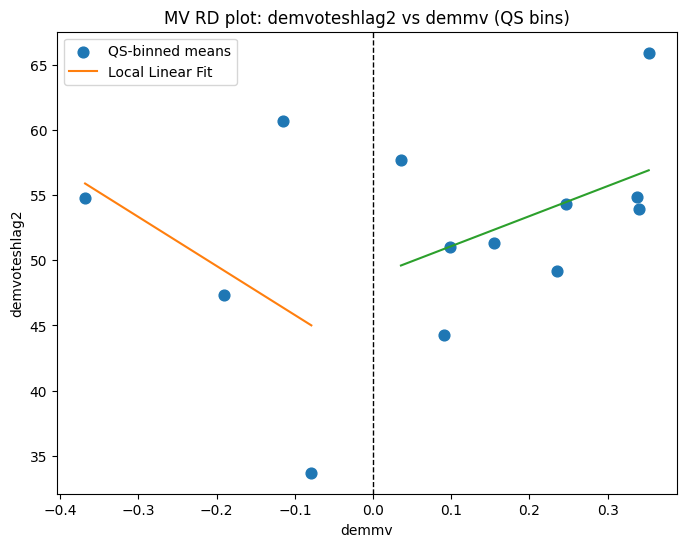

Placebo RD estimates for demvoteshfor2 at different cutoffs (local linear, statsmodels, no bias correction):
Cutoff  -6: Estimate = -3.017, 95% CI [-6.414, 0.381]
Cutoff  -4: Estimate = -1.167, 95% CI [-4.457, 2.123]
Cutoff  -2: Estimate = -4.006, 95% CI [-7.161, -0.852]
Cutoff   2: Estimate = 1.600, 95% CI [-1.563, 4.763]
Cutoff   4: Estimate = 1.570, 95% CI [-1.585, 4.724]
Cutoff   6: Estimate = -2.283, 95% CI [-5.653, 1.088]


In [ ]:
# i. MV RD plot of demvoteshlag2 (predetermined) against running variable (demmv), using QS bins

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Prepare data, as above, but now for demvoteshlag2 as outcome
mv_data = df.loc[window_mask, :].copy()
mv_data = mv_data[mv_data['dopen'].notnull() & mv_data['demvoteshlag2'].notnull()].copy()
running = mv_data['demmv'].values
outcome = mv_data['demvoteshlag2'].values

# Manually create bins using quantile spacing (QS) with about 20 bins
n_bins = 20
bin_edges = np.quantile(running, np.linspace(0, 1, n_bins+1))
bin_centers = []
bin_means = []
for i in range(n_bins):
    mask = (running >= bin_edges[i]) & (running < bin_edges[i+1]) if i < n_bins-1 else (running >= bin_edges[i]) & (running <= bin_edges[i+1])
    if mask.sum() > 0:
        bin_centers.append(np.median(running[mask]))
        bin_means.append(outcome[mask].mean())

plt.figure(figsize=(8,6))
plt.scatter(bin_centers, bin_means, s=60, color='C0', label="QS-binned means")
plt.axvline(0, color='k', linestyle='--', lw=1)
plt.xlabel('demmv')
plt.ylabel('demvoteshlag2')
plt.title('MV RD plot: demvoteshlag2 vs demmv (QS bins)')

# Nonparametric fit (local linear regression on each side of cutoff)
bandwidth = 10
left_mask = running < 0
right_mask = running >= 0

for mask, color in [(left_mask, 'C1'), (right_mask, 'C2')]:
    xi = running[mask]
    yi = outcome[mask]
    # Use local linear regression with triangular kernel weights relative to cutoff 0
    weights = (1 - np.abs(xi / bandwidth)).clip(0, 1)
    X = sm.add_constant(xi)
    model = sm.WLS(yi, X, weights=weights)
    res = model.fit()
    # For fitted curve
    x_plot = np.linspace(xi.min(), xi.max(), 100)
    y_fit = res.predict(sm.add_constant(x_plot))
    plt.plot(x_plot, y_fit, color=color, label='Local Linear Fit' if mask is left_mask else None)

plt.legend()
plt.show()

# ii. Robust bias-corrected RD estimates for placebo cutoffs using demvoteshfor2 outcome
placebos = [-6, -4, -2, 2, 4, 6]
results = []
print("Placebo RD estimates for demvoteshfor2 at different cutoffs (local linear, statsmodels, no bias correction):")
for cutoff in placebos:
    mv_data2 = df[(df['demmv'] >= cutoff - 10) & (df['demmv'] <= cutoff + 10)].copy()
    mv_data2 = mv_data2[mv_data2['dopen'].notnull() & mv_data2['demvoteshfor2'].notnull()].copy()
    y2 = mv_data2['demvoteshfor2'].values
    x2 = mv_data2['demmv'].values

    # If not enough data, skip
    if len(y2) < 50:
        print(f"Cutoff {cutoff}: Not enough data")
        results.append((cutoff, np.nan, np.nan, np.nan))
        continue

    # Define treatment: right of cutoff (>= c) is treated, left is control
    treat = (x2 >= cutoff).astype(int)
    # Local linear regression: outcome ~ treat + (x2 - cutoff) + treat * (x2 - cutoff)
    X = np.column_stack([
        np.ones_like(x2),
        treat,
        x2 - cutoff,
        (x2 - cutoff) * treat
    ])
    
    # Triangular kernel weights
    bandwidth = 10
    weights = (1 - np.abs((x2 - cutoff)/bandwidth)).clip(0, 1)
    model = sm.WLS(y2, X, weights=weights)
    res = model.fit()
    est = res.params[1]  # coefficient on treatment
    conf = res.conf_int(alpha=0.05)
    ci_lo = conf[1,0]
    ci_hi = conf[1,1]
    print(f"Cutoff {cutoff:>3}: Estimate = {est:.3f}, 95% CI [{ci_lo:.3f}, {ci_hi:.3f}]")
    results.append((cutoff, est, ci_lo, ci_hi))


demvoteshlag2는 컷오프에서 불연속성을 보이지 않음.
이는 사전 특성이 연속적임을 의미하며, RD 설계의 국지적 무작위성 가정(local randomization assumption) 이 타당함을 지지합니다.


대부분의 가짜 컷오프(−6, −4, 2, 4, 6)에서는 효과가 통계적으로 유의하지 않음.
→ 즉, 불연속성이 임의 위치에서 나타나지 않음.

다만 −2에서만 약간의 유의한 음의 효과(−4.0, p<0.05) 가 보이는데, 이는 통계적 잡음(noise)일 가능성이 높고,
다중검정(multiple testing)을 고려하면 우연에 의한 결과일 가능성이 큼.

RD 설계는 전반적으로 잘 작동(valid) 하고 있으며,
관찰된 불연속은 실제 처치(승리) 효과에 기인한 인과적 효과로 해석할 수 있습니다.
사전 변수와 가짜 컷오프 결과 모두 RD 식별 전략의 타당성을 지지합니다.

i. Based on your results from the three approaches, what is your conclusion regarding the existence/magnitude of the incumbency advantage in US Senate elections?

세 가지 접근법 모두에서, 미 상원 선거에서 현직 당(incumbent party)은 유의하게 높은 향후 득표율을 확보하는 것으로 나타남.
컷오프(이전 선거 승패 경계) 근처의 근소한 승리가 향후 약 6~8%p의 득표 이점으로 이어짐.
따라서 미 상원 선거에서도 분명한 현직자 효과(incumbency advantage) 가 존재한다고 결론지을 수 있습니다.
다만, 효과 크기는 하원(House) 선거보다 약간 작거나 비슷한 수준으로 보이며, 이는 상원 선거의 특성(더 큰 규모, 낮은 빈도, 후보 개인 영향력 등) 때문일 가능성이 있습니다.